# Business Objectives

The **aim** of this case study is to `identify patterns which indicate if a client has difficulty paying their installments` which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

The company wants to understand the `driving factors (or driver variables) behind loan default`, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

In [2]:
#import ang ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
%matplotlib inline
from matplotlib import style

In [2]:
pd.set_option('display.max_columns', 250) #display all the columns
pd.set_option('display.max_rows', 250) #display maximum rows
pd.set_option('display.width', None) #adjusting width of the display in characters

In [4]:
#load csv data files
app_data=pd.read_csv("application_data.csv")
prev_app=pd.read_csv("previous_application.csv")

In [7]:
#check the rows and columns of application data
app_data.shape

(307511, 122)

In [6]:
#check the rows and columns of previous application data
prev_app.shape

(1670214, 37)

In [7]:
#load the first five rows of application data
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [8]:
#load the first five rows of previous application data
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#descriptive statistics of application data
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [10]:
#descriptive statistics of previous application data
prev_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [11]:
#concise summary of application data
app_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [12]:
#concise summary of previous application data
prev_app.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [13]:
#data types of the application data columns
app_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [14]:
#data types of the previous application data columns
prev_app.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [15]:
#count of distinct observations (unique values) for each column in application data
app_data.nunique(axis=0,dropna=True)

SK_ID_CURR                      307511
TARGET                               2
NAME_CONTRACT_TYPE                   2
CODE_GENDER                          3
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
CNT_CHILDREN                        15
AMT_INCOME_TOTAL                  2548
AMT_CREDIT                        5603
AMT_ANNUITY                      13672
AMT_GOODS_PRICE                   1002
NAME_TYPE_SUITE                      7
NAME_INCOME_TYPE                     8
NAME_EDUCATION_TYPE                  5
NAME_FAMILY_STATUS                   6
NAME_HOUSING_TYPE                    6
REGION_POPULATION_RELATIVE          81
DAYS_BIRTH                       17460
DAYS_EMPLOYED                    12574
DAYS_REGISTRATION                15688
DAYS_ID_PUBLISH                   6168
OWN_CAR_AGE                         62
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE         

In [16]:
#count of distinct observations (unique values) for each column in previous application data
prev_app.nunique(axis=0,dropna=True)

SK_ID_PREV                     1670214
SK_ID_CURR                      338857
NAME_CONTRACT_TYPE                   4
AMT_ANNUITY                     357959
AMT_APPLICATION                  93885
AMT_CREDIT                       86803
AMT_DOWN_PAYMENT                 29278
AMT_GOODS_PRICE                  93885
WEEKDAY_APPR_PROCESS_START           7
HOUR_APPR_PROCESS_START             24
FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
RATE_DOWN_PAYMENT               207033
RATE_INTEREST_PRIMARY              148
RATE_INTEREST_PRIVILEGED            25
NAME_CASH_LOAN_PURPOSE              25
NAME_CONTRACT_STATUS                 4
DAYS_DECISION                     2922
NAME_PAYMENT_TYPE                    4
CODE_REJECT_REASON                   9
NAME_TYPE_SUITE                      7
NAME_CLIENT_TYPE                     4
NAME_GOODS_CATEGORY                 28
NAME_PORTFOLIO                       5
NAME_PRODUCT_TYPE                    3
CHANNEL_TYPE             

In [17]:
#the column titles for application data
app_data.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [18]:
#the column titles for previous application data
prev_app.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

In [19]:
#percentage of null values of application data columns in descending order
(app_data.isnull().sum()/len(app_data)*100).sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [20]:
#percentage of null values of previous application data columns in descending order
(prev_app.isnull().sum()/len(prev_app)*100).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
RATE_DOWN_PAYMENT              53.636480
AMT_DOWN_PAYMENT               53.636480
NAME_TYPE_SUITE                49.119754
DAYS_TERMINATION               40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_FIRST_DRAWING             40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_LAST_DUE                  40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
AMT_APPLICATION                 0.000000
NAME_PAYMENT_TYPE               0.000000
NAME_CASH_LOAN_P

## Data Cleaning of Application Data

### Analyzing and dropping unnecessary columns

We will drop the columns with >=50% null values as this can affect the analysis of the data. The columns with over 50% data are not considered to have a significant relation to the target variable.

In [21]:
#dropping columns with more than 50% null values from application data
app_data=app_data.loc[:,(app_data.isnull().sum()/len(app_data)*100)<=50]

In [22]:
#check shape after dropping columns
app_data.shape

(307511, 81)

In [23]:
#identify columns in application data with less than 50% null values
null_val=pd.DataFrame((app_data.isnull().sum()/len(app_data)*100)).reset_index(drop=False)
null_val.columns=['Columns','Null Percentage']
null_val=null_val.sort_values('Null Percentage',ascending=False)
null_val.sort_values('Null Percentage',ignore_index=True,ascending=False)

,Columns,Null Percentage
0,FLOORSMAX_AVG,49.760822
1,FLOORSMAX_MEDI,49.760822
2,FLOORSMAX_MODE,49.760822
3,YEARS_BEGINEXPLUATATION_AVG,48.781019
4,YEARS_BEGINEXPLUATATION_MEDI,48.781019
5,YEARS_BEGINEXPLUATATION_MODE,48.781019
6,TOTALAREA_MODE,48.268517
7,EMERGENCYSTATE_MODE,47.398304
8,OCCUPATION_TYPE,31.345545
9,EXT_SOURCE_3,19.825307


In [24]:
#identify columns in application data with less than 14% null values
null_val_13=null_val[(null_val['Null Percentage']<=14)&(null_val['Null Percentage']>0)]
null_val_13.sort_values('Null Percentage',ignore_index=True,ascending=False)

,Columns,Null Percentage
0,AMT_REQ_CREDIT_BUREAU_YEAR,13.501631
1,AMT_REQ_CREDIT_BUREAU_HOUR,13.501631
2,AMT_REQ_CREDIT_BUREAU_DAY,13.501631
3,AMT_REQ_CREDIT_BUREAU_WEEK,13.501631
4,AMT_REQ_CREDIT_BUREAU_MON,13.501631
5,AMT_REQ_CREDIT_BUREAU_QRT,13.501631
6,NAME_TYPE_SUITE,0.420148
7,DEF_30_CNT_SOCIAL_CIRCLE,0.332021
8,OBS_60_CNT_SOCIAL_CIRCLE,0.332021
9,DEF_60_CNT_SOCIAL_CIRCLE,0.332021


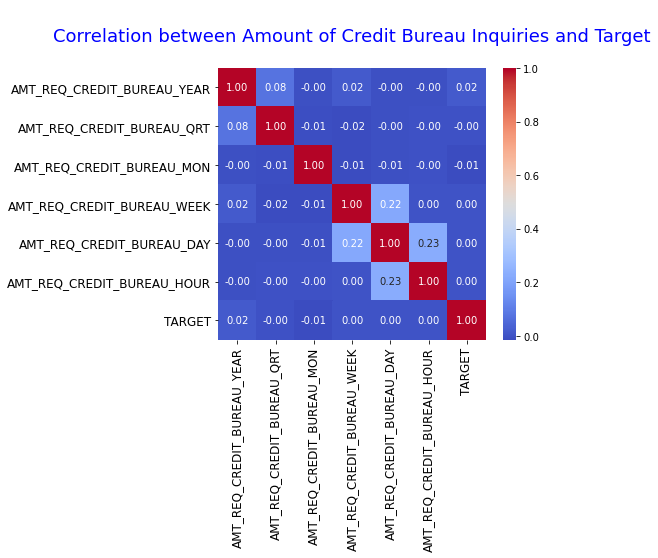

In [25]:
amt_req=app_data[['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','TARGET']]
amt_req_corr=amt_req.corr()
plt.figure(figsize=(6,5))
sns.heatmap(data=amt_req_corr,cmap="coolwarm",annot=True,fmt=".2f")
plt.xticks(size=12)
plt.yticks(size=12)
plt.title("\nCorrelation between Amount of Credit Bureau Inquiries and Target\n",fontsize=18,loc="center",color="Blue")
plt.show()

From the above heatmap we can see that the columns:

AMT_REQ_CREDIT_BUREAU_YEAR
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_QRT

have `no correlation to the Target` variable column.

Hence, these can be dropped from app_data.

In [26]:
#dropping AMT_REQ columns
app_data.drop(['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR'],axis=1,inplace=True)

In [27]:
#checking the number of rows and columns
app_data.shape

(307511, 75)

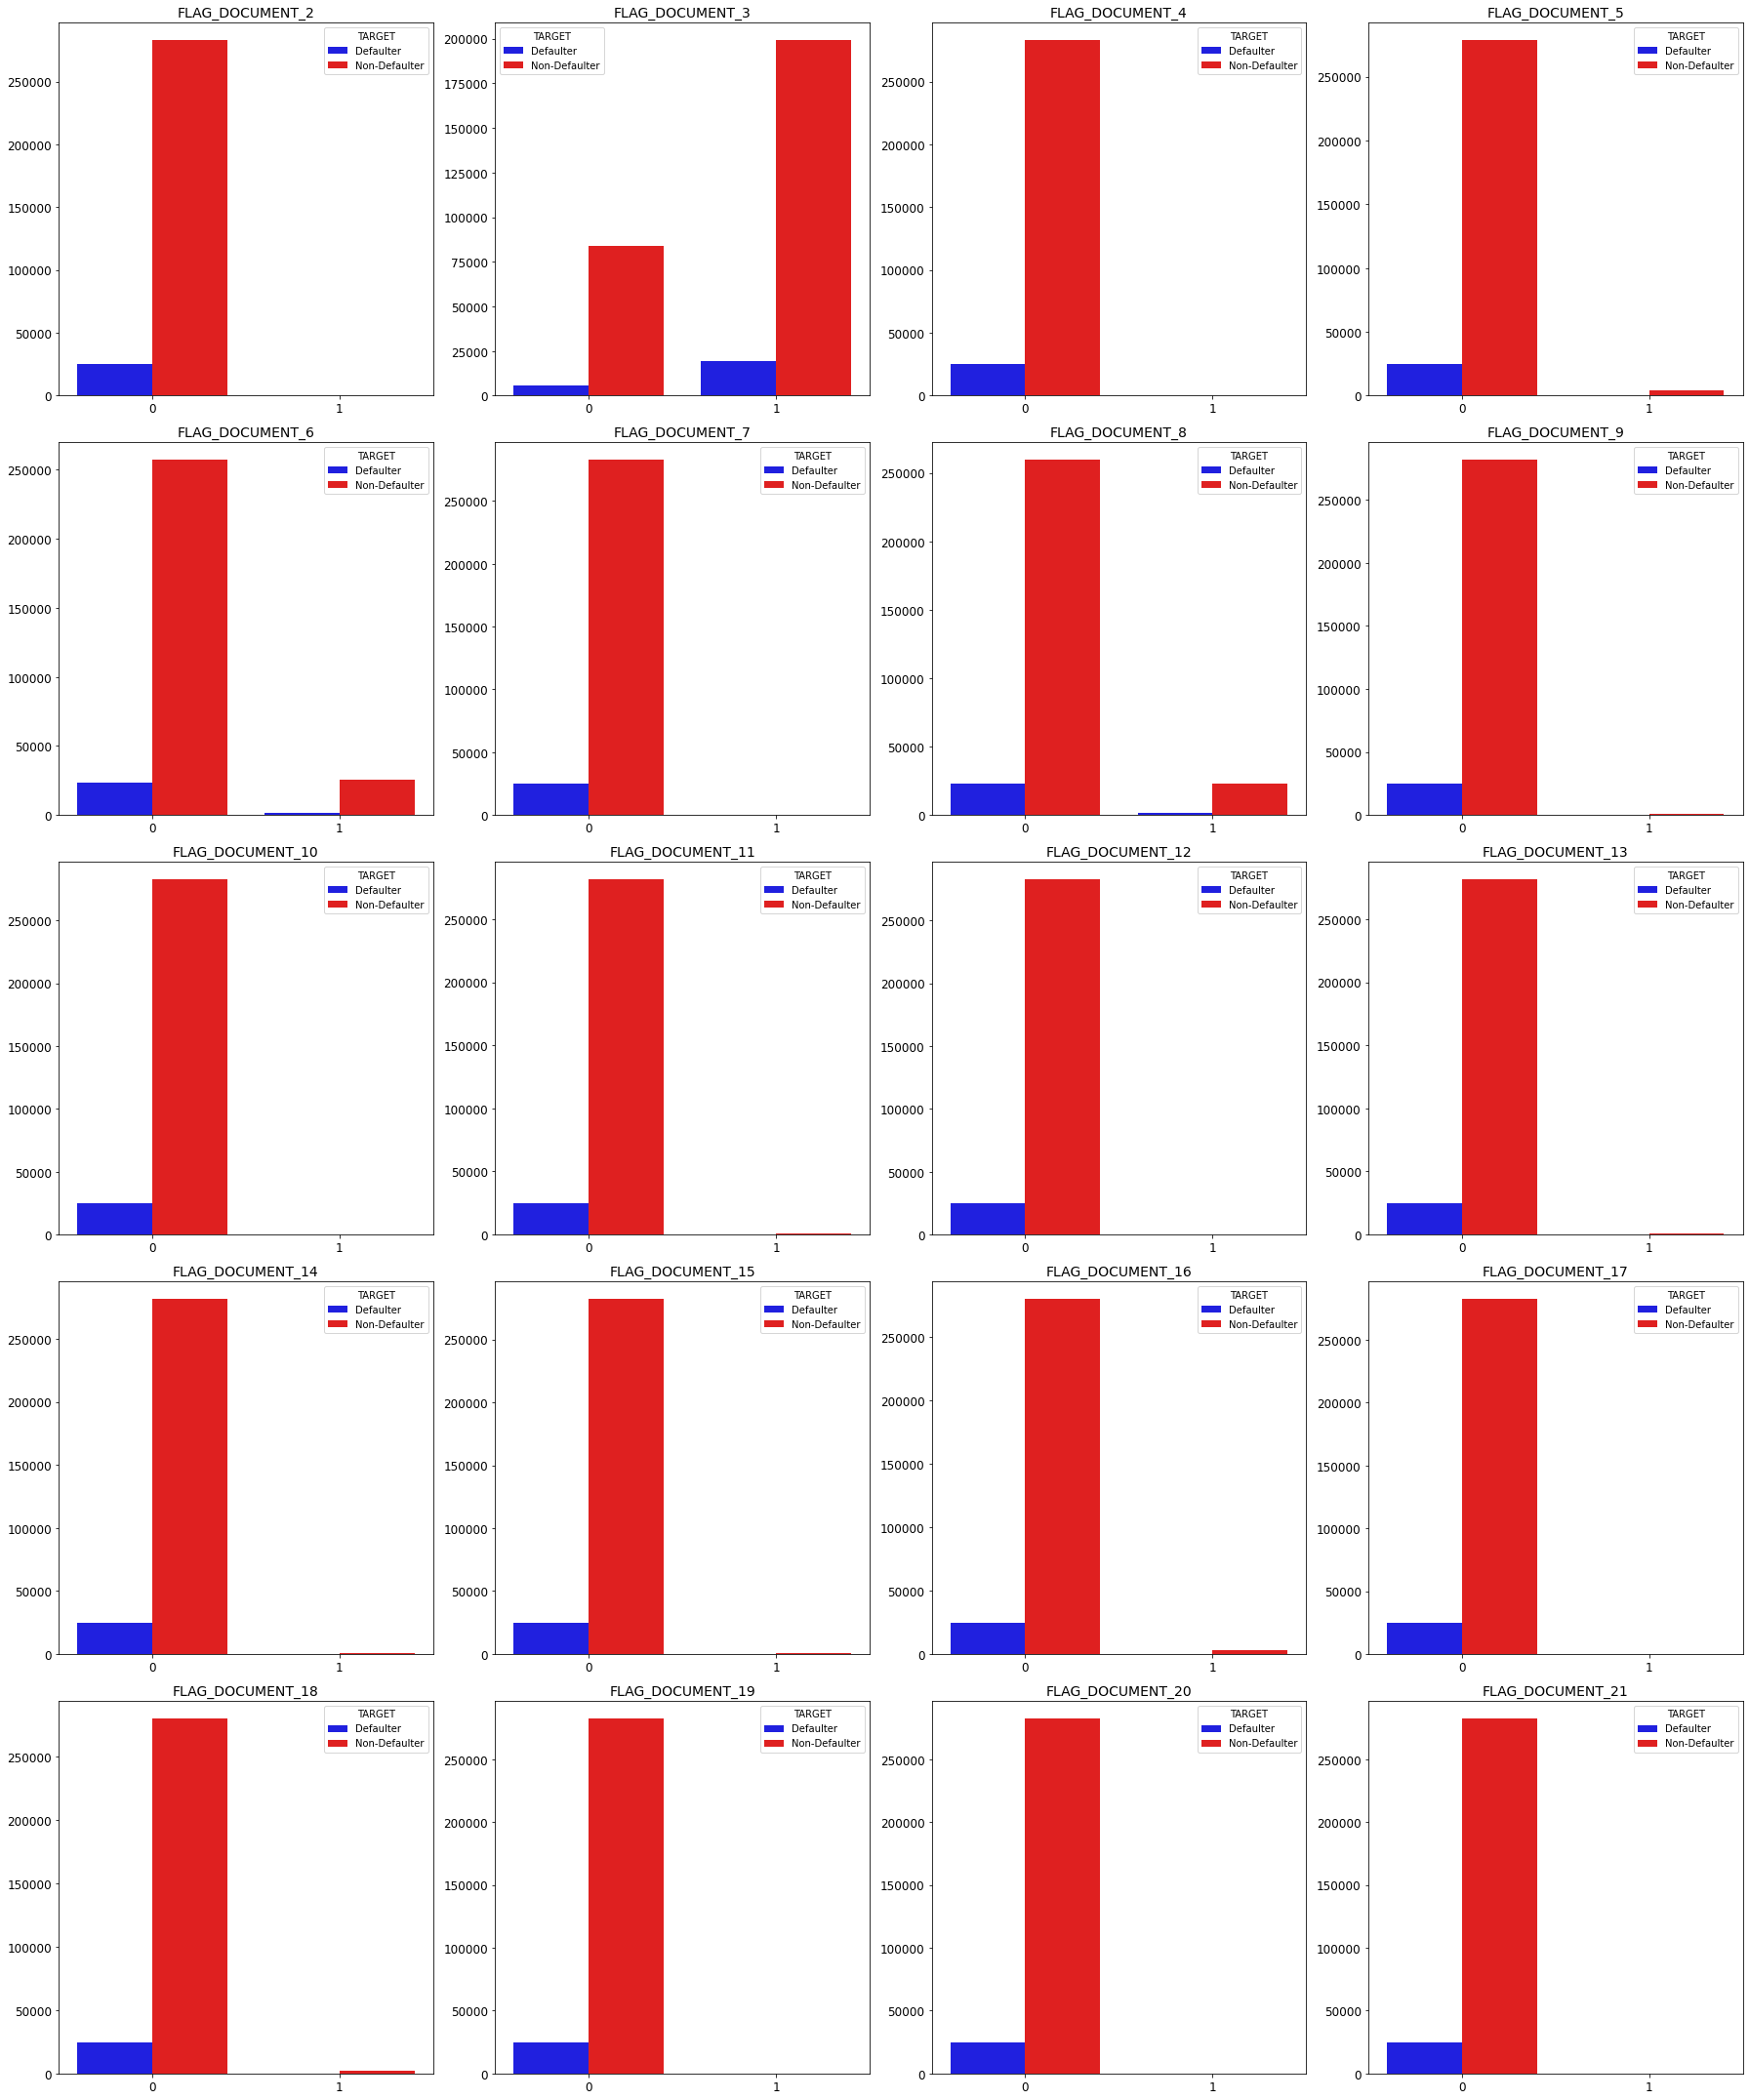

In [28]:
#combining all flag document columns into one
flag_col=['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']
df_flag=app_data[flag_col+['TARGET']]
df_flag['TARGET']=df_flag['TARGET'].replace({1:"Defaulter",0:"Non-Defaulter"})
n=len(flag_col)

fig=plt.figure(figsize=(25,30))

for i,j in itertools.zip_longest(flag_col,range(n)):
    plt.subplot(5,4,j+1)
    ax=sns.countplot(df_flag[i],hue=df_flag['TARGET'],palette=['b','r'])
    plt.xlabel("")
    plt.xticks(size=12)
    plt.ylabel("")
    plt.yticks(size=12)
    plt.tight_layout()
    plt.title(i,size=14)

From the above plots, we can see that a small percentage of applicants have submitted Flag Documents 6 and 8. The only significant column here is Flag document 3 which indicates that applicants that fill this document are more likely to repay their loan. 

We can drop the other flag columns as they have no significant influence on the Target variable.

In [29]:
#dropping the necessary columns from the Flag document dataframe
df_flag=df_flag.drop(["FLAG_DOCUMENT_3","TARGET"],axis=1)
df_flag.shape

(307511, 19)

In [30]:
#Drop the redundant flag document columns in df_flag from app_data
app_data=app_data.drop(columns=[x for x in df_flag if x in app_data])
app_data.shape

(307511, 56)

There are 5 flag columns regarding contact information provided by the applicant. We will create a correlation matrix between these columns and the target variable to see if any relationship exists.

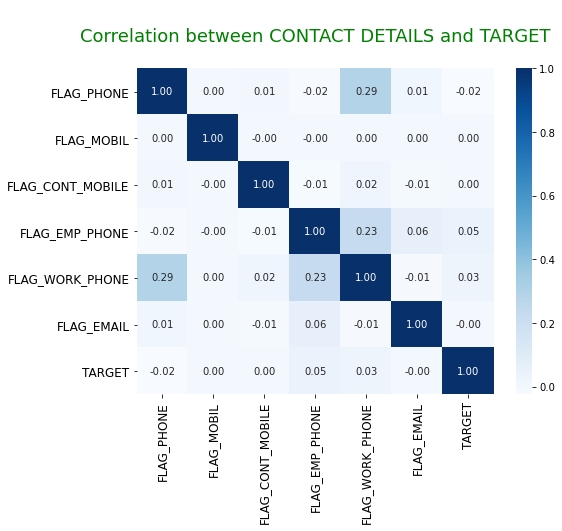

In [31]:
#combining flag contact details into one column and creating a heatmap
flag_contact=app_data[['FLAG_PHONE','FLAG_MOBIL','FLAG_CONT_MOBILE','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_EMAIL','TARGET']]
flag_contact_corr=flag_contact.corr()
plt.figure(figsize=(8,6))
sns.heatmap(data=flag_contact_corr,cmap="Blues",annot=True,fmt=".2f")
plt.xticks(size=12)
plt.yticks(size=12)
plt.title("\nCorrelation between CONTACT DETAILS and TARGET\n",loc="center",fontsize=18,color="Green")
plt.show()

From the heatmap we can see there is no correlation between these variables and the target variable, and therefore we will drop these columns.

In [32]:
#dropping flag contact columns
app_data.drop(['FLAG_PHONE','FLAG_MOBIL','FLAG_CONT_MOBILE','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_EMAIL'],axis=1,inplace=True)

There are columns with over 40% null values that are related to housing(i.e, normalized values about where the applicant lives) and the weekday,hour when the the loan was applied for, which we aren't necessary for the purposes of our case study and will drop these columns.

In [33]:
#dropping unnecesary columns
app_data=app_data.drop(['FLOORSMAX_AVG','FLOORSMAX_MODE','FLOORSMAX_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BEGINEXPLUATATION_MODE','YEARS_BEGINEXPLUATATION_AVG','TOTALAREA_MODE','EMERGENCYSTATE_MODE','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START'],axis=1)

In [34]:
# number of rows and columns after dropping
app_data.shape

(307511, 40)

In [35]:
#sorting the null values percentage
(app_data.isnull().mean()*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
NAME_TYPE_SUITE                 0.420148
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_3                 0.000000
AMT_CREDIT                      0.000000
NAME_INCOME_TYPE                0.000000
FLAG_OWN_REALTY                 0.000000
AMT_INCOME_TOTAL                0.000000
CNT_CHILDREN                    0.000000
NAME_FAMILY_STATUS              0.000000
FLAG_OWN_CAR                    0.000000
CODE_GENDER                     0.000000
NAME_CONTRACT_TYPE              0.000000
TARGET                          0.000000
NAME_EDUCATION_TYPE             0.000000
DAYS_REGISTRATIO

## Standardizing Data

### Checking data types of numeric columns

In [36]:
#checking application data types
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

`The data types of the numeric columns in the application data are "int" or "float" and do not need to be converted.`

In [37]:
#first five rows of dataframe
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0


### Converting Days columns with negative values to absolute values

Here, we can see the DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION, DAYS_ID_PUBLISH and DAYS_LAST_PHONE_CHANGE are negative values which isn't possible and should be converted to positive values.

In [38]:
#converting the days columns below from negative to positive value with abs()
app_data[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']]=abs(app_data[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']])
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461.0,637.0,3648.0,2120.0,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765.0,1188.0,1186.0,291.0,Core staff,2.0,1,1,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046.0,225.0,4260.0,2531.0,Laborers,1.0,2,2,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005.0,3039.0,9833.0,2437.0,Laborers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932.0,3038.0,4311.0,3458.0,Core staff,1.0,2,2,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0


### Changing data type from object to category

For the columns which have few possible values with lots of repetition, the category data type would be more suited and fasted as it is more useful for our purposes.
Hence, we will convert these numerical and object type columns, to categorical for efficiency.

In [39]:
#converting object data type to categorical data type
categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
                       'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']

for col in categorical_columns:
    app_data[col]=pd.Categorical(app_data[col])

In [40]:
#summary of the application data to see the change of data types to category from objects
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

### Binning and identifying outliers

Converting from numerical to categorical columns for columns relevant to our analysis.

We can bin these columns to understand the distribution of data and identify the percentage of applicants within the given ranges.

These continuous variables can be binned into ranges (categorical bins) for ease of understanding the distribution.

#####  Amount Income Total

In [41]:
#descriptive statistics summary
app_data['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

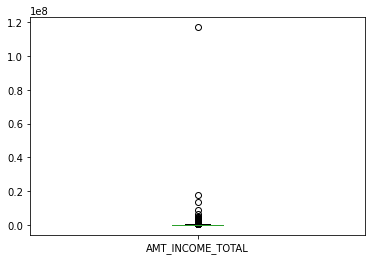

In [42]:
#boxplot for amt_income_total
app_data['AMT_INCOME_TOTAL'].plot.box()
plt.show()

We can see the farthest outlier for this column(the maximum value) is significantly higher than the other values. This can skew the data if not treated properly.

Let's see the row with the extreme outlier

In [43]:
#the row with the maximum amt income total
app_data[app_data['AMT_INCOME_TOTAL']>=117000000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010643,12615.0,922.0,6762.0,3643.0,Laborers,3.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.113161,0.145543,0.0,0.0,0.0,0.0,0.0,1


Upon further inspection, we see that the above outlier with the maximum income total lists occupation type as laborer. 
This seems unlikely and requires further analysis for which we will use Z score.

In [44]:
#checking records with z score over 3 for amount income
from scipy import stats
amt_inc_out = app_data[np.abs(stats.zscore(app_data['AMT_INCOME_TOTAL']))>3]
print(len(amt_inc_out))

454


**`Inference`**

- We can tell from the above code that 454 of the rows in amt_income_total column are outliers and can be removed.

Because more than 99% of the data lies between -3 and 3 in a normal distribution. 

**`Suggestion:`**

We could remove these outlier rows with Z score above 3 with:

`app_data=app_data[(amt_inc_out<3).all(axis=1)`

However, we recommend capping the data at the 99th percentile so we can keep the data and analyse.

With capping, we prevent loss of information that these outliers provide. The number of outlier rows are significant enough that tehy are valuable data that can contribute to understanding the attributes better. Deleting them would affect the overall analysis of the variable.

Hence, deletion is not recommended for these rows.


**Dropping extreme outlier that is most likely an incorrect entry**


However we recommend deleting the extreme outlier row with the maximum value shown above as it is most likely an erroneous entry and could affect the analysis. 

We will do so with the following code.

`app_data.drop(12840,inplace=True)`

In [45]:
#binning into categorical ranges
app_data['AMT_INCOME_TOTAL_K']=app_data['AMT_INCOME_TOTAL']/100000
app_data['AMT_INCOME_RANGE']=pd.cut(app_data['AMT_INCOME_TOTAL_K'],bins=[0,1,2,3,4,5,6,7,8,9,10,11],
                                    labels=['0-100K','100K-200K','200K-300K','300K-400K','400K-500K',
                                            '500K-600K','600K-700K','700K-800K','800K-900K','900K-1M',
                                           '1M and above'])

In [46]:
#checking that object columns have been converted to category
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

In [47]:
#distribution of applicants in terms of income ranges
app_data['AMT_INCOME_RANGE'].value_counts(normalize=True)*100

100K-200K       50.735000
200K-300K       21.210691
0-100K          20.729695
300K-400K        4.776116
400K-500K        1.744669
500K-600K        0.356354
600K-700K        0.282805
800K-900K        0.096980
700K-800K        0.052721
900K-1M          0.009112
1M and above     0.005858
Name: AMT_INCOME_RANGE, dtype: float64

**`Inference`**
- From the above value_counts, we can see that almost 96% of the loan applicants have a total income below 400K.
- 50% of the applicants have an income range of 100K-200K.

In [48]:
#dropping Amount credit in K column 
app_data.drop(['AMT_INCOME_TOTAL_K'],axis=1,inplace=True)

##### Amount Credit

In [49]:
#descriptive statistics summary
app_data['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

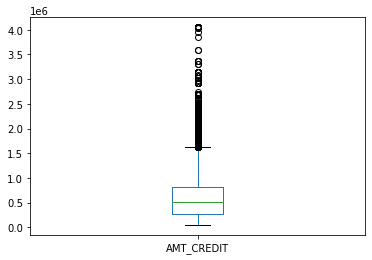

In [50]:
#boxplot for amt_credit
app_data['AMT_CREDIT'].plot.box()
plt.show()

In [51]:
#the rows with the maximum amt credit
app_data[app_data['AMT_CREDIT']>=4050000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_INCOME_RANGE
14852,117337,0,Cash loans,M,N,Y,1,760846.5,4050000.0,146002.5,4050000.0,Unaccompanied,Commercial associate,Higher education,Married,Office apartment,0.072508,12796.0,1372.0,3556.0,4646.0,Managers,3.0,1,1,0,0,0,0,0,0,Trade: type 7,0.639547,0.805020,0.0,0.0,0.0,0.0,858.0,0,700K-800K
17948,120926,0,Cash loans,M,Y,N,2,783000.0,4050000.0,258025.5,4050000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.009549,15176.0,201.0,1529.0,4722.0,Managers,4.0,2,2,1,1,0,1,1,1,Industry: type 4,0.706927,0.553165,0.0,0.0,0.0,0.0,5.0,0,700K-800K
110459,228135,0,Cash loans,M,N,N,2,864900.0,4050000.0,102384.0,4050000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.025164,14940.0,632.0,1272.0,1265.0,Managers,4.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.280597,0.786267,3.0,1.0,3.0,1.0,4.0,0,800K-900K
119681,238782,0,Cash loans,M,Y,Y,1,931365.0,4050000.0,102514.5,4050000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.030755,12536.0,681.0,1859.0,4601.0,Managers,3.0,2,2,0,0,0,0,1,1,Transport: type 4,0.571261,0.652897,0.0,0.0,0.0,0.0,0.0,0,900K-1M
120757,240007,0,Cash loans,M,N,N,0,587250.0,4050000.0,106969.5,4050000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.046220,19893.0,421.0,10025.0,3307.0,NaN,2.0,1,1,0,1,1,0,1,1,Industry: type 1,0.663432,NaN,0.0,0.0,0.0,0.0,1.0,0,500K-600K
133766,255139,0,Cash loans,F,Y,N,1,1307587.5,4050000.0,100197.0,4050000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.072508,15450.0,251.0,2730.0,1334.0,Managers,3.0,1,1,0,0,0,0,0,0,Trade: type 2,0.628098,0.538863,1.0,0.0,1.0,0.0,231.0,0,NaN
287732,433294,0,Cash loans,F,Y,N,1,405000.0,4050000.0,102514.5,4050000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,11355.0,426.0,43.0,1058.0,Accountants,3.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.592158,NaN,3.0,0.0,3.0,0.0,2.0,0,400K-500K
288455,434170,0,Cash loans,F,Y,N,1,450000.0,4050000.0,106839.0,4050000.0,Unaccompanied,Commercial associate,Higher education,Civil marriage,House / apartment,0.035792,16609.0,3044.0,126.0,134.0,Managers,3.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.685893,0.758393,1.0,0.0,1.0,0.0,1.0,0,400K-500K


There are 8 rows that have a significantly higher credit amount, much higher than 75% of the applicants as per the descriptive statistics summary. These are extreme outliers.

Dropping these rows is not recommended as they appear to be valid entries.

**`Suggestion:`**
    
We recommend capping the data at 99th percentile. Being cognizant of the extreme outlier in this column, and refraining from using mean (due to its sensitivity to outliers) and looking at the median/quantiles for its analysis.

In [52]:
#binning into categorical ranges
app_data['AMT_CREDIT_K']=app_data['AMT_CREDIT']/100000
app_data['AMT_CREDIT_RANGE']=pd.cut(app_data['AMT_CREDIT_K'],bins=[0,1,2,3,4,5,6,7,8,9,10,100],
                                    labels=['0-100K','100K-200K','200K-300K','300K-400K','400K-500K',
                                            '500K-600K','600K-700K','700K-800K','800K-900K','900K-1M',
                                           '1M and above'])

In [53]:
#distribution of applicants in terms of income ranges
app_data['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

200K-300K       17.824728
1M and above    16.254703
500K-600K       11.131960
400K-500K       10.418489
100K-200K        9.801275
300K-400K        8.564897
600K-700K        7.820533
800K-900K        7.086576
700K-800K        6.241403
900K-1M          2.902986
0-100K           1.952450
Name: AMT_CREDIT_RANGE, dtype: float64

**`Inference`**

- From the above value_counts, we can see that for 16% of the loan applicants their credit loan amount is 1 million and above.
- Almost 18% of the applicants have a credit loan amount of 200K-300K.
- Approximately 12% of the loan applicants have a credit loan amount less than 200K, this means ~88% have credit loan amounts above 200K.

In [54]:
#dropping Amount credit in K column 
app_data.drop(['AMT_CREDIT_K'],axis=1,inplace=True)

`We will see the descriptive statistics and identify outliers through boxplot for the following Amount two columns`

#####  Amount Annuity

In [55]:
#descriptive statistics summary
app_data['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

From the descriptive statistics of this column, we can see that the maximum value is much higher than the value at 75% (upper quartile), indicating the presence of outliers.
We can use a boxplot to see the distribution of the data.

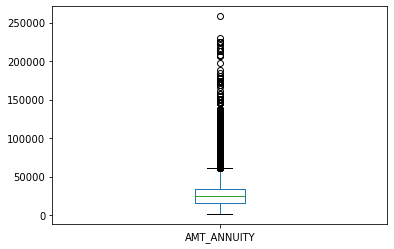

In [56]:
#boxplot for amt_annuity
app_data['AMT_ANNUITY'].plot.box()
plt.show()

Let us look at the details of the outlier row which has the maximum amount annuity value.

**`Suggestion:`**

There are many outliers in this column, and hence it is not ideal to delete these values.

Binning would be recommended for the Annuity column to understand the nature of the many outliers present.

This can be done with dividing the columns by 10,000 and then using pd.qcut:

`app_data['AMT_ANNUITY']=app_data['AMT_ANNUITY']/100000`

`pd.cut(app_data['AMT_ANNUITY'],bins=[0,1,2,3,4,5,100]labels=['0-10K','10K-20K','20K-30K','30K-40K','40K-50K','50K and above'])`

In [57]:
#quantile values of Amt Annuity
app_data['AMT_ANNUITY'].quantile([0.95,0.99,1])

0.95     53325.0
0.99     70006.5
1.00    258025.5
Name: AMT_ANNUITY, dtype: float64

We notice that there is a huge difference between the 99th percentile and maximum value for this column. The difference is at almost a factor of 4. 

Let us look into the maximum value row.

In [58]:
#the row with the maximum amt annuity
app_data[app_data['AMT_ANNUITY']>=258025.5]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
17948,120926,0,Cash loans,M,Y,N,2,783000.0,4050000.0,258025.5,4050000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.009549,15176.0,201.0,1529.0,4722.0,Managers,4.0,2,2,1,1,0,1,1,1,Industry: type 4,0.706927,0.553165,0.0,0.0,0.0,0.0,5.0,0,700K-800K,1M and above


We can see that this maximum value row is likely a valid entry and is an extreme outlier. 

**`Suggestion`**

Capping the data at 99th percentile and being aware of this outlier during analysis and considering imputation of null values is recommended.

##### Amount Goods Price

In [59]:
#descriptive statistics summary
app_data['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

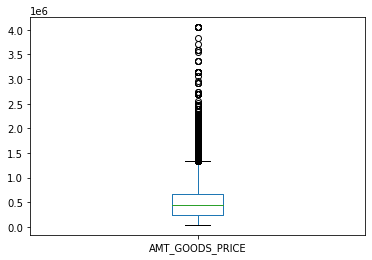

In [60]:
#boxplot for amt_goods_price
app_data['AMT_GOODS_PRICE'].plot.box()
plt.show()

In [61]:
#the row with the maximum amt_goods_price
app_data[app_data['AMT_GOODS_PRICE']>=4050000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
14852,117337,0,Cash loans,M,N,Y,1,760846.5,4050000.0,146002.5,4050000.0,Unaccompanied,Commercial associate,Higher education,Married,Office apartment,0.072508,12796.0,1372.0,3556.0,4646.0,Managers,3.0,1,1,0,0,0,0,0,0,Trade: type 7,0.639547,0.805020,0.0,0.0,0.0,0.0,858.0,0,700K-800K,1M and above
17948,120926,0,Cash loans,M,Y,N,2,783000.0,4050000.0,258025.5,4050000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.009549,15176.0,201.0,1529.0,4722.0,Managers,4.0,2,2,1,1,0,1,1,1,Industry: type 4,0.706927,0.553165,0.0,0.0,0.0,0.0,5.0,0,700K-800K,1M and above
110459,228135,0,Cash loans,M,N,N,2,864900.0,4050000.0,102384.0,4050000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.025164,14940.0,632.0,1272.0,1265.0,Managers,4.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.280597,0.786267,3.0,1.0,3.0,1.0,4.0,0,800K-900K,1M and above
119681,238782,0,Cash loans,M,Y,Y,1,931365.0,4050000.0,102514.5,4050000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.030755,12536.0,681.0,1859.0,4601.0,Managers,3.0,2,2,0,0,0,0,1,1,Transport: type 4,0.571261,0.652897,0.0,0.0,0.0,0.0,0.0,0,900K-1M,1M and above
120757,240007,0,Cash loans,M,N,N,0,587250.0,4050000.0,106969.5,4050000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.046220,19893.0,421.0,10025.0,3307.0,NaN,2.0,1,1,0,1,1,0,1,1,Industry: type 1,0.663432,NaN,0.0,0.0,0.0,0.0,1.0,0,500K-600K,1M and above
133766,255139,0,Cash loans,F,Y,N,1,1307587.5,4050000.0,100197.0,4050000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.072508,15450.0,251.0,2730.0,1334.0,Managers,3.0,1,1,0,0,0,0,0,0,Trade: type 2,0.628098,0.538863,1.0,0.0,1.0,0.0,231.0,0,NaN,1M and above
287732,433294,0,Cash loans,F,Y,N,1,405000.0,4050000.0,102514.5,4050000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,11355.0,426.0,43.0,1058.0,Accountants,3.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.592158,NaN,3.0,0.0,3.0,0.0,2.0,0,400K-500K,1M and above
288455,434170,0,Cash loans,F,Y,N,1,450000.0,4050000.0,106839.0,4050000.0,Unaccompanied,Commercial associate,Higher education,Civil marriage,House / apartment,0.035792,16609.0,3044.0,126.0,134.0,Managers,3.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.685893,0.758393,1.0,0.0,1.0,0.0,1.0,0,400K-500K,1M and above


In [62]:
#quantile values of Amt Goods Price
app_data['AMT_GOODS_PRICE'].quantile([0.95,0.99,1])

0.95    1305000.0
0.99    1800000.0
1.00    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

**`Suggestion:`**

Similarly, there are many outliers in this column as well, and hence it is not ideal to delete these values. 
Binning would be recommended for the Annuity column to understand the nature of the many outliers present.

This can be done with dividing the columns by 10,000 and then using pd.qcut:

`app_data['AMT_GOODS_PRICE']=app_data['AMT_GOODS_PRICE']/100000`

`pd.qcut(app_data['AMT_GOODS_PRICE'],bins=[0,1,2,3,4,5,100],labels=['0-100K','100K-200K','200K-300K','300K-400K','400K-500K','500Kand above'])`

Similarly, capping the data at 99th percentile due to the difference between the maximum value (an extreme outlier) is recommended.


##### Days Birth

In [63]:
#descriptive statistics summary
app_data['DAYS_BIRTH'].describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

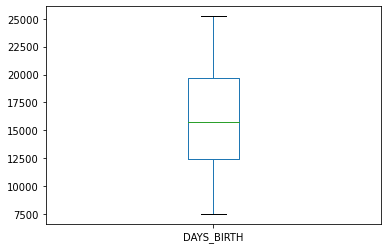

In [64]:
#boxplot for Days birth
app_data['DAYS_BIRTH'].plot.box()
plt.show()

In [65]:
#converting data from days to years and binning into age groups
app_data['AGE']=app_data['DAYS_BIRTH']//365
app_data['AGE_GROUP']=pd.cut(app_data['AGE'],bins=[0,20,30,40,50,100],
                             labels=['0-20','20-30','30-40','40-50','50 above'])

In [66]:
#age group distribution among applicants
app_data['AGE_GROUP'].value_counts(normalize=True)*100

50 above    31.604398
30-40       27.028952
40-50       24.194582
20-30       17.171743
0-20         0.000325
Name: AGE_GROUP, dtype: float64

**`Inference`**

- There are no outliers in this column and hence, the data is reliable.
- Almost 32% of the loan application are 50 and above. With 30-40 age group consisting of 27%. 56% of the loan applicants are above the age of 40.
- 0-20 have the lowest percentage because these are the youngest group of applicants and most people applying for loans would be for student loans. Which are generally requires a minimum age of 16-18.

##### Days Employed

In [67]:
#descriptive statistics summary
app_data['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

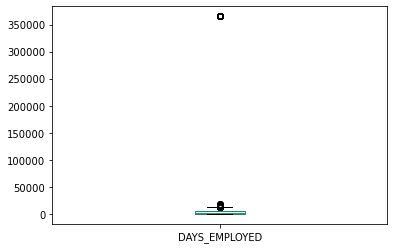

In [68]:
#boxplot for Days employed
app_data['DAYS_EMPLOYED'].plot.box()
plt.show()

The maximum entry is 365243 days (i.e 1000 years of employment) which is impossible and an extreme outlier which needs to be removed.
Let us further examine these entries.

In [69]:
#the row with the maximum years employed
app_data[app_data['DAYS_EMPLOYED']>=365243]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AGE,AGE_GROUP
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,20099.0,365243.0,7427.0,3514.0,NaN,2.0,2,2,0,0,0,0,0,0,XNA,0.205747,0.751724,1.0,0.0,1.0,0.0,0.0,1,100K-200K,1M and above,55.0,50 above
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.015221,20417.0,365243.0,5246.0,2512.0,NaN,2.0,2,2,0,0,0,0,0,0,XNA,0.555183,0.652897,0.0,0.0,0.0,0.0,2396.0,0,0-100K,100K-200K,55.0,50 above
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006296,24827.0,365243.0,9012.0,3684.0,NaN,2.0,3,3,0,0,0,0,0,0,XNA,0.624305,0.669057,0.0,0.0,0.0,0.0,795.0,0,0-100K,200K-300K,68.0,50 above
38,100045,0,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006207,23920.0,365243.0,9817.0,4969.0,NaN,2.0,2,2,0,0,0,0,0,0,XNA,0.650765,0.751724,0.0,0.0,0.0,0.0,0.0,1,0-100K,200K-300K,65.0,50 above
43,100050,0,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,675000.0,Unaccompanied,Pensioner,Higher education,Single / not married,House / apartment,0.010966,23548.0,365243.0,5745.0,4576.0,NaN,1.0,2,2,0,0,0,0,0,0,XNA,0.766138,0.684828,0.0,0.0,0.0,0.0,491.0,1,100K-200K,700K-800K,64.0,50 above
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,Cash loans,F,N,Y,0,202500.000,703728.0,29943.0,607500.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.031329,22414.0,365243.0,11976.0,4171.0,NaN,1.0,2,2,0,0,0,0,0,0,XNA,0.195625,0.360613,11.0,2.0,11.0,0.0,1667.0,1,200K-300K,700K-800K,61.0,50 above
307483,456227,0,Cash loans,F,N,Y,0,99000.000,247275.0,16479.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Separated,House / apartment,0.007330,24911.0,365243.0,11211.0,4213.0,NaN,1.0,2,2,0,0,0,0,0,0,XNA,0.589906,0.520898,1.0,1.0,1.0,1.0,1775.0,0,0-100K,200K-300K,68.0,50 above
307487,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,936000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.010147,23125.0,365243.0,5485.0,4115.0,NaN,2.0,2,2,0,0,0,0,0,0,XNA,0.307082,0.255332,0.0,0.0,0.0,0.0,846.0,1,100K-200K,1M and above,63.0,50 above
307505,456249,0,Cash loans,F,N,Y,0,112500.000,225000.0,22050.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.022800,24384.0,365243.0,7369.0,2357.0,NaN,1.0,2,2,0,0,0,0,0,0,XNA,0.346391,0.742182,0.0,0.0,0.0,0.0,0.0,0,100K-200K,200K-300K,66.0,50 above


We can see that there's a large number of entries with 1000 years of employment(an incorrect entry) which means this could be a default incorrect entry. 

**`Suggestion:`**

The number of outliers with an incorrect entry in this column are significant enough to affect our analysis. We recommend changing these values to np.Nan.

This can be done with the following code.

In [70]:
#checking the change in the values to null
app_data.loc[app_data['DAYS_EMPLOYED']==365243,['DAYS_EMPLOYED']]=np.nan

In [71]:
#the row with the maximum years employed
app_data[app_data['DAYS_EMPLOYED']>=364243]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AGE,AGE_GROUP


Now we will create a column with days employed converted to years and then another employment year range column to understand the applicant data distribution

In [72]:
#converting data from days to years and binning into years of employment groups
app_data['YEARS_EMPLOYED']=round(app_data['DAYS_EMPLOYED']//365,2)
app_data['EMPLOYMENT_YEAR']=pd.cut(app_data['YEARS_EMPLOYED'],bins=[0,5,10,20,30,40,50,60,100],
                             labels=['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 and above'])

In [73]:
#distribution of employment years among applicants
app_data['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100

0-5             55.582363
5-10            24.966441
10-20           14.564315
20-30            3.750117
30-40            1.058720
40-50            0.078044
60 and above     0.000000
50-60            0.000000
Name: EMPLOYMENT_YEAR, dtype: float64

**`Inference`**

- 55% of loan applicants have less than 5 years of work experience.
- 80% of loan applicants have been employed for less than 10 years.
- Less than 5 have been employed for over 20 years. Conversely, 95% of loan applicants have less than 20 years of employment.

### Imputing Null Values

We will examine the columns with null value percentage and make suggestions

In [74]:
#examine columns with null values
(app_data.isnull().mean()*100).sort_values(ascending=False)[:15]

OCCUPATION_TYPE             31.345545
EMPLOYMENT_YEAR             27.081308
EXT_SOURCE_3                19.825307
YEARS_EMPLOYED              18.007161
DAYS_EMPLOYED               18.007161
NAME_TYPE_SUITE              0.420148
DEF_60_CNT_SOCIAL_CIRCLE     0.332021
OBS_60_CNT_SOCIAL_CIRCLE     0.332021
DEF_30_CNT_SOCIAL_CIRCLE     0.332021
OBS_30_CNT_SOCIAL_CIRCLE     0.332021
EXT_SOURCE_2                 0.214626
AMT_GOODS_PRICE              0.090403
AMT_INCOME_RANGE             0.075444
AMT_ANNUITY                  0.003902
CNT_FAM_MEMBERS              0.000650
dtype: float64

##### Occupation Type

In [75]:
#the count of values for occupation type
app_data.OCCUPATION_TYPE.value_counts(normalize=True)*100

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64

**`Inference`**

- 26% of the loan applicants are Laborers.
- Sales staff at 15% are the second most profession among loan applicants.
- This column has 31% of null values and hence, the occupation type of 31% of the loan applicants is unknown.

**`Suggestion`**

There are 31% null values in Occupation type column. With categorical columns, the mode value can be substituted for null values. In this case, the number of null values are significantly high percentage and imputation would affect the analysis.

We recommned, converting null values to "Unknown" category so that missing values are accounted for without imputation.

This can be done with the following code:

`app_data.OCCUPATION_TYPE.fillna("Unknown")`

##### Code Gender

In [76]:
#value counts for the gender column
app_data.CODE_GENDER.value_counts(normalize=True)*100

F      65.834393
M      34.164306
XNA     0.001301
Name: CODE_GENDER, dtype: float64

**`Suggestion`**

There are 4 values named XNA which are unknown values. 
We can leave these values as they are, because they are a very small number of 4 rows. 

Alternatively, we recommend changing these XNA values to null so they do not show up as a separate value when we analyse the data.

`app_data.CODE_GENDER.replace("XNA","")`

##### Name Type Suite

In [77]:
#value counts for the name type suite column
app_data.NAME_TYPE_SUITE.value_counts(normalize=True)*100

Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: NAME_TYPE_SUITE, dtype: float64

**`Suggestion`**

We can impute the null values in this categorical column with the mode of the columns.

The following code will be used:

`app_data.NAME_TYPE_SUITE.fillna(app_data.NAME_TYPE_SUITE.mode()[0])`

##### Count of Family Members

In [78]:
#descriptive statistics for count family members columns
app_data.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

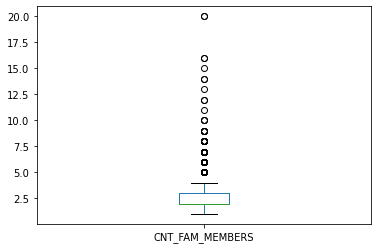

In [79]:
#boxplot of count family members column
app_data.CNT_FAM_MEMBERS.plot.box()
plt.show()

In [80]:
#records with the maximum value
app_data[app_data['CNT_FAM_MEMBERS']>=20]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AGE,AGE_GROUP,YEARS_EMPLOYED,EMPLOYMENT_YEAR
155369,280108,0,Cash loans,F,N,Y,19,112500.0,269550.0,13891.5,225000.0,Family,Working,Secondary / secondary special,Single / not married,House / apartment,0.007020,11057.0,1853.0,3096.0,745.0,Waiters/barmen staff,20.0,2,2,0,0,0,0,0,0,Restaurant,0.553968,NaN,1.0,1.0,1.0,1.0,744.0,1,100K-200K,200K-300K,30.0,20-30,5.0,0-5
265784,407877,0,Cash loans,F,N,Y,19,112500.0,135000.0,8788.5,135000.0,Unaccompanied,Working,Higher education,Single / not married,House / apartment,0.015221,10297.0,896.0,4733.0,2599.0,Core staff,20.0,2,2,0,0,0,0,0,0,Kindergarten,0.167332,0.574447,1.0,0.0,1.0,0.0,2495.0,1,100K-200K,100K-200K,28.0,20-30,2.0,0-5


In [81]:
#descriptive summary of count children
app_data.CNT_CHILDREN.describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

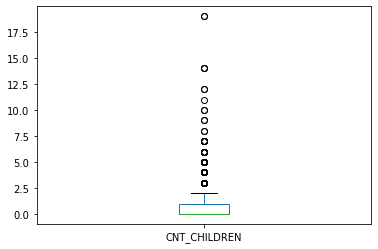

In [82]:
#boxplot of count children
app_data.CNT_CHILDREN.plot.box()
plt.show()

In [83]:
#records with the maximum value for count children
app_data[app_data['CNT_CHILDREN']>=19]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AGE,AGE_GROUP,YEARS_EMPLOYED,EMPLOYMENT_YEAR
155369,280108,0,Cash loans,F,N,Y,19,112500.0,269550.0,13891.5,225000.0,Family,Working,Secondary / secondary special,Single / not married,House / apartment,0.007020,11057.0,1853.0,3096.0,745.0,Waiters/barmen staff,20.0,2,2,0,0,0,0,0,0,Restaurant,0.553968,NaN,1.0,1.0,1.0,1.0,744.0,1,100K-200K,200K-300K,30.0,20-30,5.0,0-5
265784,407877,0,Cash loans,F,N,Y,19,112500.0,135000.0,8788.5,135000.0,Unaccompanied,Working,Higher education,Single / not married,House / apartment,0.015221,10297.0,896.0,4733.0,2599.0,Core staff,20.0,2,2,0,0,0,0,0,0,Kindergarten,0.167332,0.574447,1.0,0.0,1.0,0.0,2495.0,1,100K-200K,100K-200K,28.0,20-30,2.0,0-5


These two columns have two female single/unmarried applicants with 19 children. This is an extreme outlier as per the boxplot. 

These two rows could be dropped so as not affect the analysis. 

Alternatively, we would suggest capping the data at 99th percentile to avoid losing information on potentially valid entries.

**`Suggestion:`**

We recommend imputing the null values of this column with the median value because of the presence of outliers.

`app_data.CNT_CHILDREN=app_data.CNT_CHILDREN.fillna(app_data.CNT_CHILDREN.median())`

##### EXT_SOURCE_2

In [84]:
#external source 2 null value percentage
app_data.EXT_SOURCE_2.isnull().mean()*100

0.21462646864665005

<AxesSubplot:>

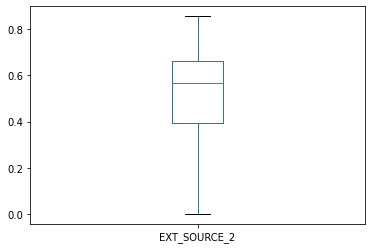

In [85]:
#boxplot of external source 2
app_data.EXT_SOURCE_2.plot.box()

**`Suggestion`**

We can see that there are no outliers and there is a very small percentage of missing values. We recommend imputing null values with the mean for this column.

`app_data.EXTSOURCE_2.fillna(app_data.EXT_SOURCE_2.mean())`

##### EXT_SOURCE_3

In [86]:
#null value percentage for external source 3
app_data.EXT_SOURCE_3.isnull().mean()*100

19.825307062186393

<AxesSubplot:>

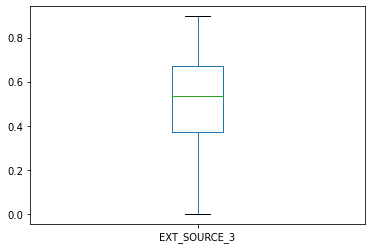

In [87]:
#external source 3 boxplot
app_data.EXT_SOURCE_3.plot.box()

While there are no outliers in this column, the percentage of missing values is significant. Let us impute the mean, median, and mode values for this column and compare the distribution to see the values most closely resembling the original distribution.

In [88]:
#creating a data frame with EXT_SOURCE_3 and imputed null values
df0=pd.DataFrame()
df0['EXT3']=app_data['EXT_SOURCE_3']
df0['Mean']=app_data['EXT_SOURCE_3'].fillna(app_data.EXT_SOURCE_3.mean())
df0['Median']=app_data['EXT_SOURCE_3'].fillna(app_data.EXT_SOURCE_3.median())
df0['Mode']=app_data['EXT_SOURCE_3'].fillna(app_data.EXT_SOURCE_3.mode())

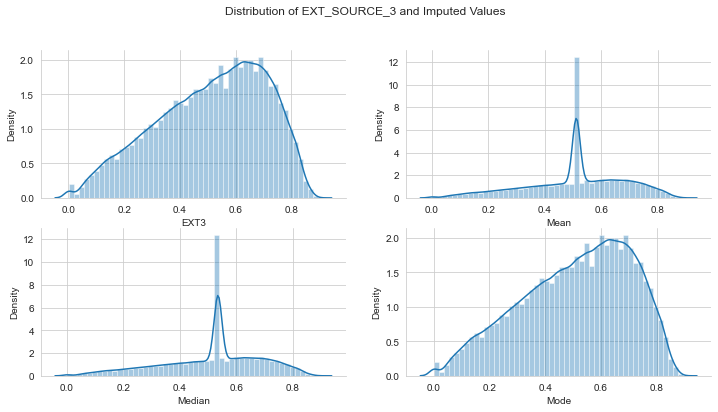

In [89]:
#displot comparing imputed columns
df0_col=['EXT3','Mean','Median','Mode']

sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
plt.suptitle("Distribution of EXT_SOURCE_3 and Imputed Values")


for i in enumerate(df0_col): 
    plt.subplot(2,2,i[0]+1)
    sns.distplot(df0[i[1]])
    sns.despine()

plt.show()

**`Suggestion`**

We can see from the above distplot that the mode value imputation is the only distplot that is similar to the orginal distribution. 

Hence, the only suitable imputation for this column would be mode.

`app_data.EXTSOURCE_3.fillna(app_data.EXT_SOURCE_3.mode())`

## Data Cleaning of Previous Application Data

### Analyzing and dropping unnecessary columns

Similarly, for the Previous application data, we will drop the columns with >=50% null values as this can affect the analysis of the data. The columns with over 40% data are not considered to have a significant relation to the target variable.

In [90]:
#checking the number of rows and columns
prev_app.shape

(1670214, 37)

In [91]:
#sorting the columns by descending order of null value percentage
(prev_app.isnull().sum()/len(prev_app)*100).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
RATE_DOWN_PAYMENT              53.636480
AMT_DOWN_PAYMENT               53.636480
NAME_TYPE_SUITE                49.119754
DAYS_TERMINATION               40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_FIRST_DRAWING             40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_LAST_DUE                  40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
AMT_APPLICATION                 0.000000
NAME_PAYMENT_TYPE               0.000000
NAME_CASH_LOAN_P

In [92]:
#dropping columns having null value percentage greater than or equal to 50%
prev_app=prev_app.loc[:,((prev_app.isnull().mean()*100)<=50)]
prev_app.shape

(1670214, 33)

In [93]:
#dropping other unnecessary columns from previous application data
prev_app.drop(['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE'],axis=1,inplace=True)
prev_app.shape

(1670214, 23)

In [94]:
#identify columns in previous application data with less than 50% null values
pre_null_val=pd.DataFrame((prev_app.isnull().sum()/len(prev_app)*100)).reset_index(drop=False)
pre_null_val.columns=['Columns','Null Percentage']
pre_null_val=pre_null_val.sort_values('Null Percentage')
pre_null_val.sort_values('Null Percentage',ignore_index=True,ascending=False)

,Columns,Null Percentage
0,NAME_TYPE_SUITE,49.119754
1,AMT_GOODS_PRICE,23.081773
2,AMT_ANNUITY,22.286665
3,CNT_PAYMENT,22.286366
4,PRODUCT_COMBINATION,0.020716
5,AMT_CREDIT,0.000060
6,NAME_CASH_LOAN_PURPOSE,0.000000
7,DAYS_DECISION,0.000000
8,SK_ID_CURR,0.000000
9,NAME_CONTRACT_TYPE,0.000000


## Standardizing Data

### Converting columns with negative values to absolute values

The Days Decision column has negative values, and this is not possible. So we will convert them to absolute values with absolute function.

In [95]:
#converting column to absolute values
prev_app['DAYS_DECISION']=abs(prev_app['DAYS_DECISION'])

### Checking data types of numeric columns

In [96]:
#previous application data types
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_TYPE_SUITE         849809 non-null   object 
 13  NAME_CLIENT_TYPE        1670214 non-null  object 
 14  NA

The numeric columns are int or float data types and do not require conversion.

Similar to the application data, for columns with a small number of repeating variables, we will convert the data types of the object data type columns to categorical columns. Category is also more efficient to use.

In [97]:
#Converting column data types from object to categorical

pre_categorical_columns = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','NAME_TYPE_SUITE',
                           'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                           'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP',
                           'PRODUCT_COMBINATION','NAME_CONTRACT_TYPE']

for col in pre_categorical_columns:
    prev_app[col] =pd.Categorical(prev_app[col])

In [98]:
#checking conversion to category data type
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1670214 non-null  int64   
 1   SK_ID_CURR              1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE      1670214 non-null  category
 3   AMT_ANNUITY             1297979 non-null  float64 
 4   AMT_APPLICATION         1670214 non-null  float64 
 5   AMT_CREDIT              1670213 non-null  float64 
 6   AMT_GOODS_PRICE         1284699 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  category
 8   NAME_CONTRACT_STATUS    1670214 non-null  category
 9   DAYS_DECISION           1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE       1670214 non-null  category
 11  CODE_REJECT_REASON      1670214 non-null  category
 12  NAME_TYPE_SUITE         849809 non-null   category
 13  NAME_CLIENT_TYPE        1670214 non-null  

### Imputing null values

In [99]:
#the null values in each column
prev_app.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY               372235
AMT_APPLICATION                0
AMT_CREDIT                     1
AMT_GOODS_PRICE           385515
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_TYPE_SUITE           820405
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT               372230
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION          346
dtype: int64

##### Name Type Suite

In [100]:
#count of values for name type suite
prev_app.NAME_TYPE_SUITE.value_counts()

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64

Here, the NAME_TYPE_SUITE column has 49% null values. The value_counts shows that almost 60% of the values are "Unaccompanied". 

**`Suggestion:`**

We could impute the missing values with "Unaccompanied" as the mode for this categorical variable.

`prev_app.NAME_TYPE_SUITE.fillna("Unaccompanied")`

Alternatively, since this could significantly affect the column, we can fill the null values with a new category as "Missing" or "Unknown". 

`prev_app.NAME_TYPE_SUITE.fillna("Unknown")`

##### NAME CASH LOAN PURPOSE

In [101]:
#value count percentage for cash loan purpose
prev_app.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True)*100

XAP                                 55.242083
XNA                                 40.588691
Repairs                              1.422872
Other                                0.934491
Urgent needs                         0.503648
Buying a used car                    0.172912
Building a house or an annex         0.161237
Everyday expenses                    0.144652
Medicine                             0.130163
Payments on other loans              0.115614
Education                            0.094180
Journey                              0.074182
Purchase of electronic equipment     0.063525
Buying a new car                     0.060591
Wedding / gift / holiday             0.057597
Buying a home                        0.051790
Car repairs                          0.047718
Furniture                            0.044845
Buying a holiday home / land         0.031912
Business development                 0.025506
Gasification / water supply          0.017962
Buying a garage                   

**`Suggestion`**

The majority of values are named XAP OR XNA which are unknown values. 

As these occupy a significant percentage of the data, we recommend changing these values to null.

`prev_data.NAME_CASH_LOAN_PURPOSE.replace("XPA","")`

`prev_data.NAME_CASH_LOAN_PURPOSE.replace("XAP","")`

##### Amount Annuity

In [102]:
#descriptive statistics summary
prev_app.AMT_ANNUITY.describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

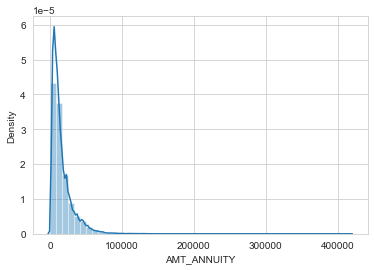

In [103]:
#distplot of Amt annuity

sns.distplot(prev_app.AMT_ANNUITY)
plt.show()

The distplot shows that the distribution of the data is dense to one side of the plot. The data is unevenly distributed and the density has a single peak to the left side with values extending across the X axis. 

This indicates the presence of outliers. Which means the mean value should not be used in this case.

**`Suggestion:`**

We can impute the null values with the median value for the column. 

`prev_app.AMT_ANNUITY=prev_app.AMT_ANNUITY.fillna(prev_app.AMT_ANNUITY.median())`

##### Amount Goods Price

In [104]:
#descriptive statistics summary
prev_app.AMT_GOODS_PRICE.describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

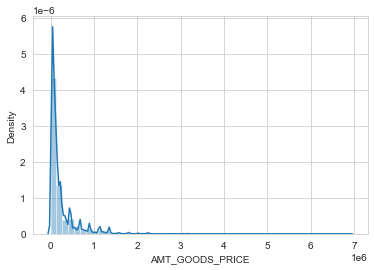

In [105]:
#distplot of Amt Goods Price

sns.distplot(prev_app.AMT_GOODS_PRICE)
plt.show()

The distplot for Amount Goods Price shows that the distribution of the data is uneven and has many peaks.

We shall compare the distribution plots of this column with null values imputed with mean,median and mode. This will show the closest distribution to the original column.



In [106]:
#creating a data frame with Amt Goods Price and imputed null values
df=pd.DataFrame()
df['AGP']=prev_app['AMT_GOODS_PRICE']
df['Mean']=prev_app['AMT_GOODS_PRICE'].fillna(prev_app.AMT_GOODS_PRICE.mean())
df['Median']=prev_app['AMT_GOODS_PRICE'].fillna(prev_app.AMT_GOODS_PRICE.median())
df['Mode']=prev_app['AMT_GOODS_PRICE'].fillna(prev_app.AMT_GOODS_PRICE.mode())

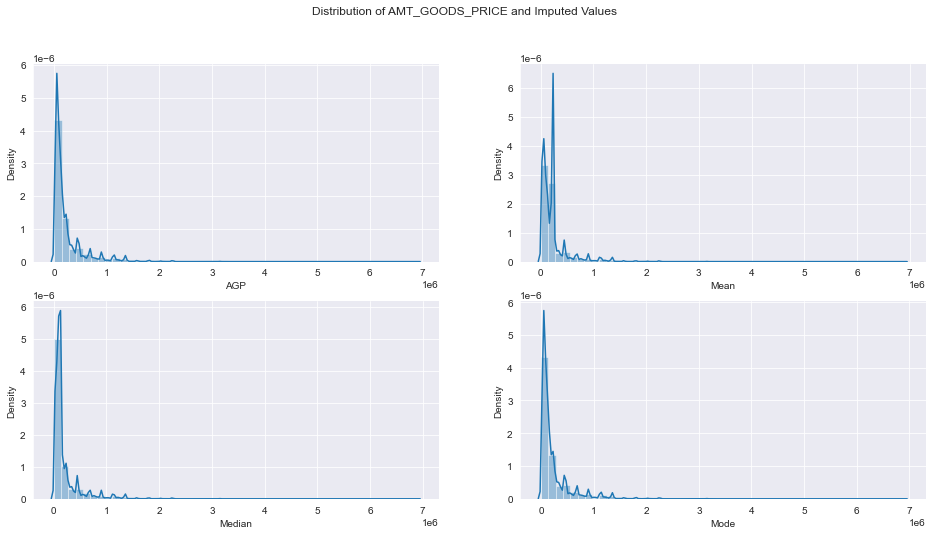

In [107]:
#creating distplots to compare closest value to original distribution
df_col=['AGP','Mean','Median','Mode']

sns.set_style("darkgrid")
plt.figure(figsize=(16,8))
plt.suptitle("Distribution of AMT_GOODS_PRICE and Imputed Values")


for i in enumerate(df_col): 
    plt.subplot(2,2,i[0]+1)
    sns.distplot(df[i[1]])
    sns.despine()

plt.show()

We can see that the distribution for median and mode imputations are closer to the original distplot of the Amount Goods Price column.However, the mode value is a better measure of central tendency in line with the original distplot.

**`Suggestion:`**

We recommend imputing null values with the mode value.

`prev_app.AMT_GOODS_PRICE=prev_app.AMT_GOODS_PRICE.fillna(prev_app.AMT_GOODS_PRICE.mode()[0])`

##### Count Payment

In [108]:
#descriptive statistics summary
prev_app.CNT_PAYMENT.describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

In [109]:
#mode value for count payment
prev_app.CNT_PAYMENT.mode()

0    12.0
dtype: float64

According to the descriptive statistics and mode the median and mode value for this column are the same.

We shall compare the distribution plots of this column with null values imputed with null,median and mode. This will show the closest distribution to the original column.


In [110]:
#creating dataframe with count payment imputed value columns 
df1=pd.DataFrame()
df1['CP']=prev_app['CNT_PAYMENT']
df1['Zero']=prev_app['CNT_PAYMENT'].fillna(0)
df1['Median']=prev_app['CNT_PAYMENT'].fillna(prev_app.CNT_PAYMENT.median())
df1['Mode']=prev_app['CNT_PAYMENT'].fillna(prev_app.CNT_PAYMENT.mode())

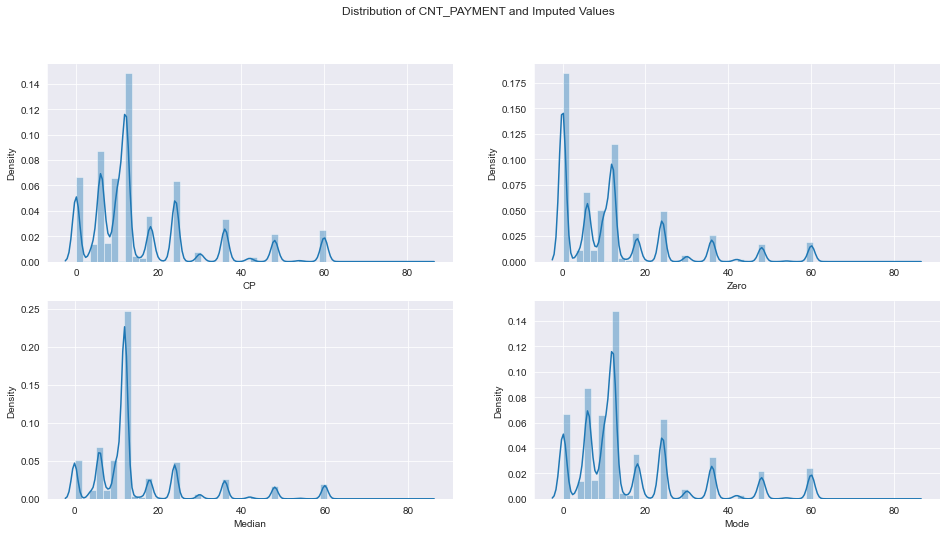

In [111]:
#distplots comparing the columns
df1_col=['CP','Zero','Median','Mode']

sns.set_style("darkgrid")
plt.figure(figsize=(16,8))
plt.suptitle("Distribution of CNT_PAYMENT and Imputed Values")


for i in enumerate(df1_col): 
    plt.subplot(2,2,i[0]+1)
    sns.distplot(df1[i[1]])
    sns.despine()

plt.show()


**`Suggestion:`**

We recommend imputing null values with the mode value.

`prev_app.CNT_PAYMENT=prev_app.CNT_PAYMENT.fillna(prev_app.CNT_PAYMENT.mode()[0])`

## Data Analysis of Application Data

### Imbalance Analysis

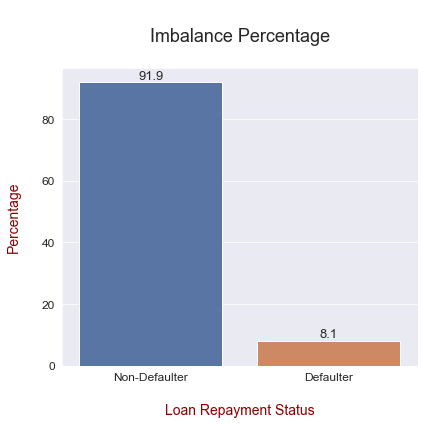

In [112]:
#barplot of target variable count
sns.set_style("darkgrid")
plt.figure(figsize=(6,6))
label=["Non-Defaulter","Defaulter"]
imb=sns.barplot(label,"TARGET",data=(app_data.TARGET.value_counts(normalize=True)*100).reset_index(),
                palette="deep",dodge=True)
for p in imb.patches:
    plt.annotate(format(p.get_height(),'.1f'),(p.get_x()+p.get_width()/2,p.get_height()+1)
                 ,ha="center",size=13)
plt.xlabel("\nLoan Repayment Status",fontsize=14,color="DarkRed")
plt.xticks(size=12)
plt.ylabel("Percentage\n",fontsize=14,color="DarkRed")
plt.yticks(size=12)
plt.title("\nImbalance Percentage\n",fontsize=18)
plt.tight_layout()
plt.show()

`Inference`

- The percentage of Non-Defaulters is almost 92% and that of Defaulters is 8% for the application data.

#### Dividing the Target variable into Defaulter and Non-Defaulter dataframes

In [113]:
#Defaulter table

target_1 = app_data[app_data["TARGET"]==1]

#Non-defaulter table

target_0 = app_data[app_data["TARGET"]==0]

In [114]:
#ratio of imbalance
print("The Ratio of Imbalance for Target Variable is 1 :",round(len(target_0)/len(target_1),2))

The Ratio of Imbalance for Target Variable is 1 : 11.39


### Categorical Univariate Analysis 

####  NAME_CONTRACT_TYPE

Text(0.5, 1.0, 'Distribution of Cash Loans and Revolving Loans\n')

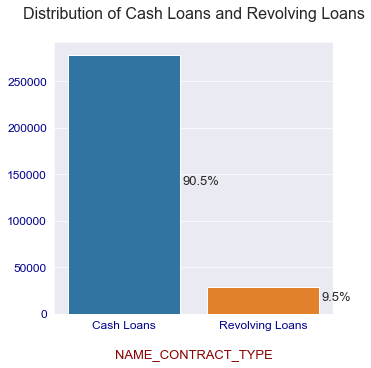

In [115]:
#percentage of loan types in application data
plt.figure(figsize=[5,5])
loan=['Cash Loans','Revolving Loans']
ctyp=sns.barplot(loan,'NAME_CONTRACT_TYPE',
              data=app_data["NAME_CONTRACT_TYPE"].value_counts().reset_index())

for p in ctyp.patches:
    percentage='{:.1f}%'.format(100*p.get_height()/len(app_data),'.2f')
    x=p.get_x()+p.get_width()+0.02
    y=p.get_y()+p.get_height()/2
    ctyp.annotate(percentage,(x,y),size=13,ha="left")

plt.xticks(size=12,color="DarkBlue")
plt.xlabel("\nNAME_CONTRACT_TYPE",fontsize=13,color="DarkRed")
plt.ylabel("")
plt.yticks(size=12,color="DarkBlue")
plt.title("Distribution of Cash Loans and Revolving Loans\n",fontsize=16)

`Inference`

- Revolving Loans make up 10% of the total distribution of loan contract type.Cash Loan are 90% of the total contract type among the applicants.
- Cash Loan are 90% of the total contract type, which means applicants prefer to apply for Cash Loans.

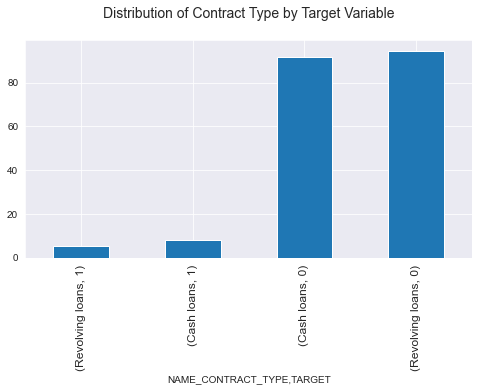

In [116]:
#distribution of contract type grouped by target variable
plt.figure(figsize=(8,4))
((app_data.groupby(["NAME_CONTRACT_TYPE"])['TARGET'].value_counts(normalize=True)*100).sort_values()).plot.bar()
plt.title("Distribution of Contract Type by Target Variable\n",size=14)
plt.xticks(size=12)
plt.show()

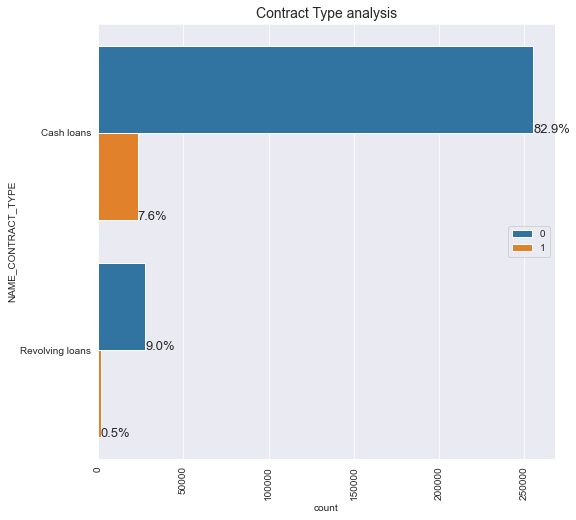

In [117]:
#Analysis by contract type
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
con1=sns.countplot(y = "NAME_CONTRACT_TYPE",hue="TARGET",data=app_data)
plt.title("Contract Type analysis",size=14)
plt.xticks(rotation=90)
for p in con1.patches:
    percentage='{:.1f}%'.format(100*p.get_width()/len(app_data),'.2f')
    y=p.get_y()+p.get_height()
    x=p.get_x()+p.get_width()-1.3
    con1.annotate(percentage,(x,y),size=13)
plt.legend(loc="right")
plt.show()

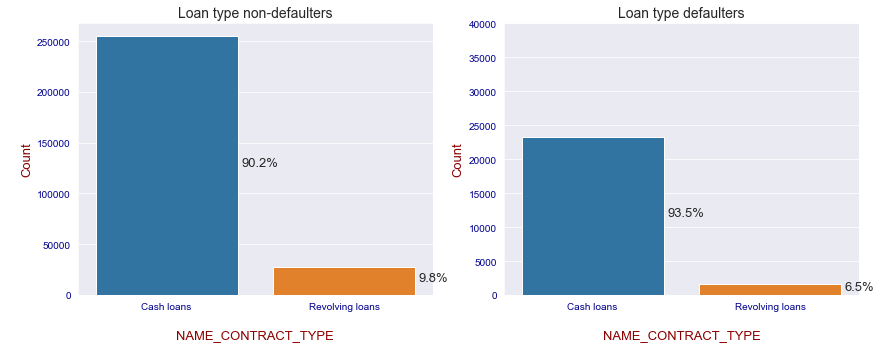

In [118]:
#countplot of name contract type for defaulters and non defaulter

plt.figure(figsize=[14,5])
plt.subplot(1,2,1)

ctype0=sns.countplot(data=target_0,x="NAME_CONTRACT_TYPE")
plt.title("Loan type non-defaulters",fontsize=14)
plt.xlabel("\nNAME_CONTRACT_TYPE",fontsize=13,color="DarkRed")
plt.xticks(size=10,color="DarkBlue")
plt.ylabel("\nCount",fontsize=13,color="DarkRed")
plt.yticks(size=10,color="DarkBlue")

for p in ctype0.patches:
    percentage='{:.1f}%'.format(100*p.get_height()/len(target_0),'.2f')
    x=p.get_x()+p.get_width()+0.02
    y=p.get_y()+p.get_height()/2
    ctype0.annotate(percentage,(x,y),size=13)

plt.subplot(1,2,2)
ctype1=sns.countplot(data=target_1,x="NAME_CONTRACT_TYPE")
plt.ylim(0,40000)
plt.title("Loan type defaulters",fontsize=14)
plt.xlabel("\nNAME_CONTRACT_TYPE",fontsize=13,color="DarkRed")
plt.xticks(size=10,color="DarkBlue")
plt.ylabel("\nCount",fontsize=13,color="DarkRed")
plt.yticks(size=10,color="DarkBlue")

for p in ctype1.patches:
    percentage='{:.1f}%'.format(100*p.get_height()/len(target_1),'.2f')
    x=p.get_x()+p.get_width()+0.02
    y=p.get_y()+p.get_height()/2
    ctype1.annotate(percentage,(x,y),size=13)
           
plt.show()

`Inference`

- Cash Loans are the most common loan type preferred among defaulters and non-defaulters. Among the 8% of Defaulters, cash loans are more common.

#### AGE RANGE

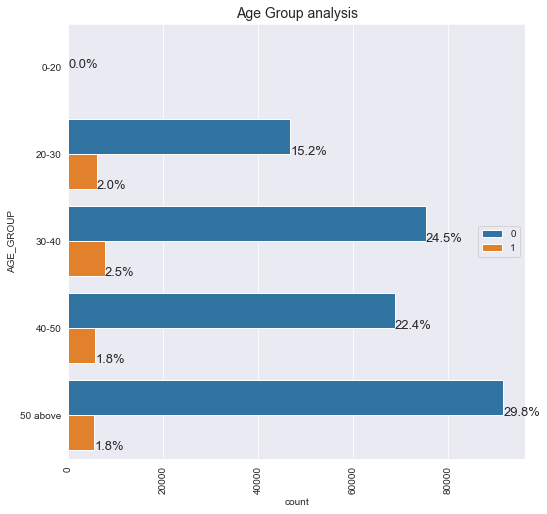

In [119]:
#Analysis by age group type
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
agg1=sns.countplot(y = "AGE_GROUP",hue="TARGET",data=app_data)
plt.title("Age Group analysis",size=14)
plt.xticks(rotation=90)
for p in agg1.patches:
    percentage='{:.1f}%'.format(100*p.get_width()/len(app_data),'.2f')
    y=p.get_y()+p.get_height()
    x=p.get_x()+p.get_width()-1.3
    agg1.annotate(percentage,(x,y),size=13)
plt.legend(loc="right")
plt.show()

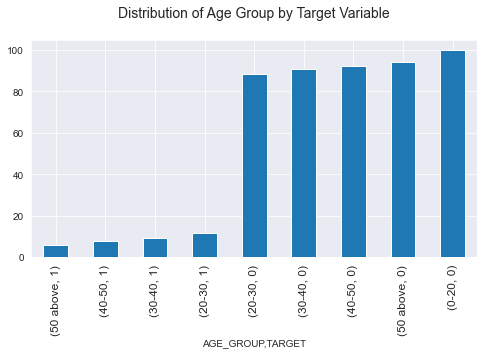

In [120]:
#distribution of age grouped by target variable
plt.figure(figsize=(8,4))
((app_data.groupby(["AGE_GROUP"])['TARGET'].value_counts(normalize=True)*100).sort_values()).plot.bar()
plt.title("Distribution of Age Group by Target Variable\n",size=14)
plt.xticks(size=12)
plt.show()

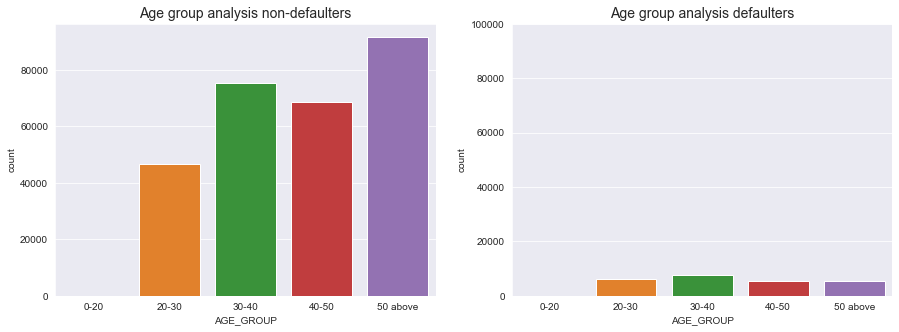

In [121]:
## plots for age group

plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.countplot(x = target_0["AGE_GROUP"])
plt.title("Age group analysis non-defaulters",size=14)
plt.subplot(1,2,2)
sns.countplot(x = target_1["AGE_GROUP"])
plt.ylim(0,100000)
plt.title("Age group analysis defaulters",size=14)
plt.show()

`Inference`

- Among non-defaulters, 50 and above are the most common age group, with 30-40 age group being second largest.
- Among defaulters, 30-40 age group is the largest with 20-30 age group being second largest.
- The highest percentage of defaulters are between 20-30 and 30-40 age group.

#### INCOME RANGE

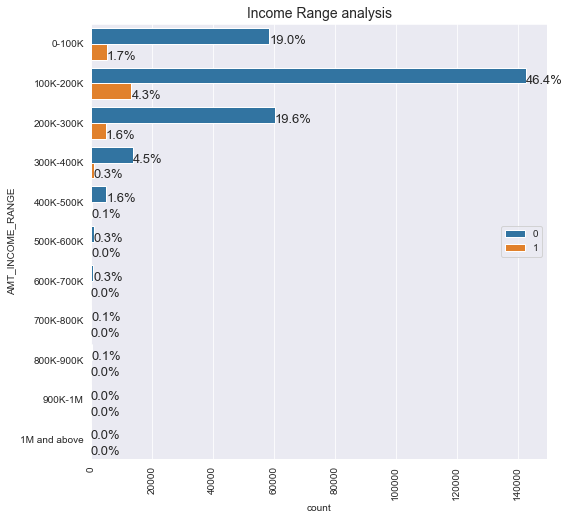

In [122]:
#Analysis by income range type
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
agg1=sns.countplot(y = "AMT_INCOME_RANGE",hue="TARGET",data=app_data)
plt.title("Income Range analysis",size=14)
plt.xticks(rotation=90)
for p in agg1.patches:
    percentage='{:.1f}%'.format(100*p.get_width()/len(app_data),'.2f')
    y=p.get_y()+p.get_height()
    x=p.get_x()+p.get_width()-1.3
    agg1.annotate(percentage,(x,y),size=13)
plt.legend(loc="right")
plt.show()

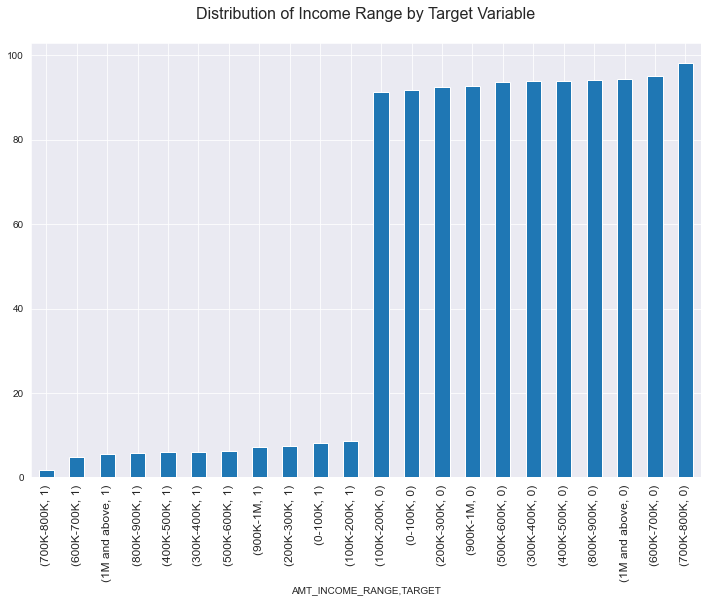

In [123]:
#distribution of income range grouped by target variable
plt.figure(figsize=(12,8))
((app_data.groupby(["AMT_INCOME_RANGE"])['TARGET'].value_counts(normalize=True)*100).sort_values()).plot.bar()
plt.title("Distribution of Income Range by Target Variable\n",size=16)
plt.xticks(size=12)
plt.show()

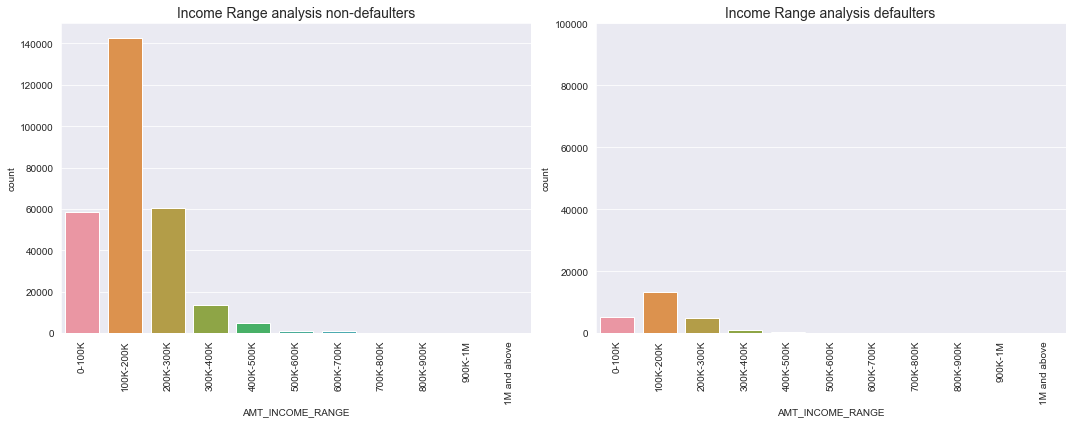

In [124]:
#plots for income range

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.countplot(x = target_0["AMT_INCOME_RANGE"])
plt.title("Income Range analysis non-defaulters",size=14)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x = target_1["AMT_INCOME_RANGE"])
plt.ylim(0,100000)
plt.title("Income Range analysis defaulters",size=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

`Inference`

- The Income Range among both defaulters and non-defaulters is concentrated among the range of 100K-200K. Followed by 200K-300K.
- Most defaulters, have an income range between 100K-200K, 0-100K,200K-300K respectively.
- Despite being high earners, the income group 900K-1M are the fourth highest defaulters.

####  OCCUPATION TYPE

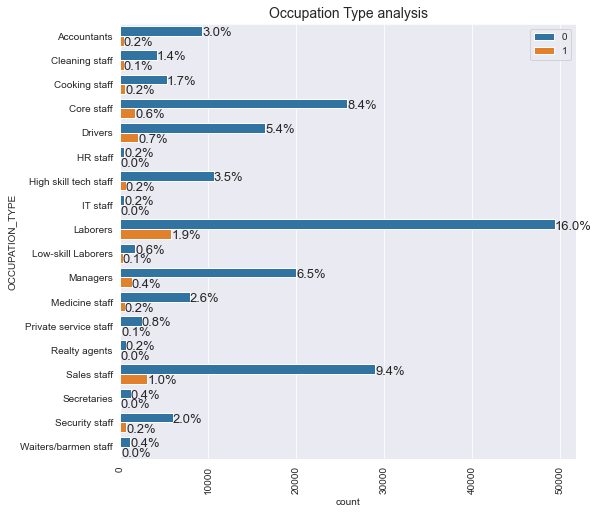

In [125]:
#Analysis by occupation type
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
occ1=sns.countplot(y = "OCCUPATION_TYPE",hue="TARGET",data=app_data)
plt.title("Occupation Type analysis",size=14)
plt.xticks(rotation=90)
for p in occ1.patches:
    percentage='{:.1f}%'.format(100*p.get_width()/len(app_data),'.2f')
    y=p.get_y()+p.get_height()
    x=p.get_x()+p.get_width()-1.3
    occ1.annotate(percentage,(x,y),size=13)
plt.legend(loc="upper right")
plt.show()

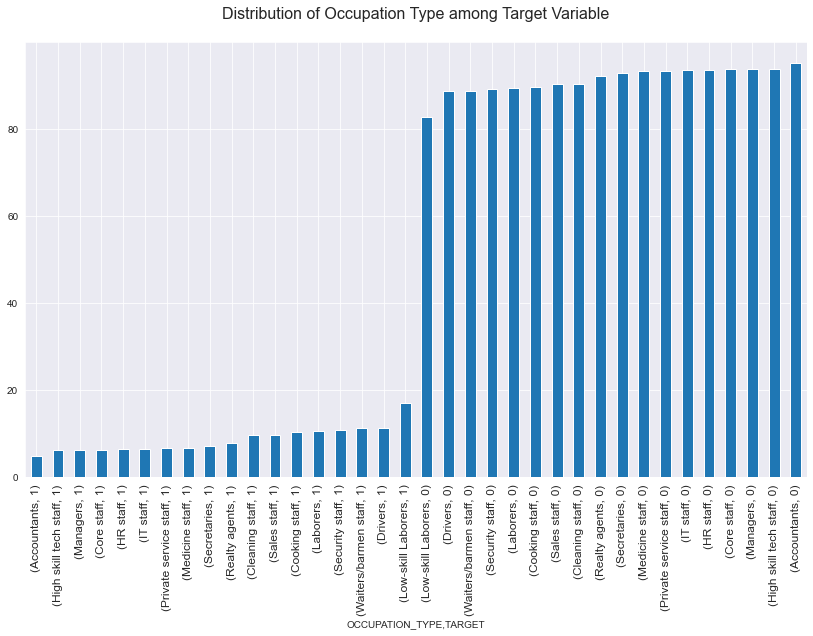

In [126]:
#distribution of occupation type grouped by target variable
plt.figure(figsize=(14,8))
((app_data.groupby(["OCCUPATION_TYPE"])['TARGET'].value_counts(normalize=True)*100).sort_values()).plot.bar()
plt.title("Distribution of Occupation Type among Target Variable\n",size=16)
plt.xticks(size=12)
plt.show()

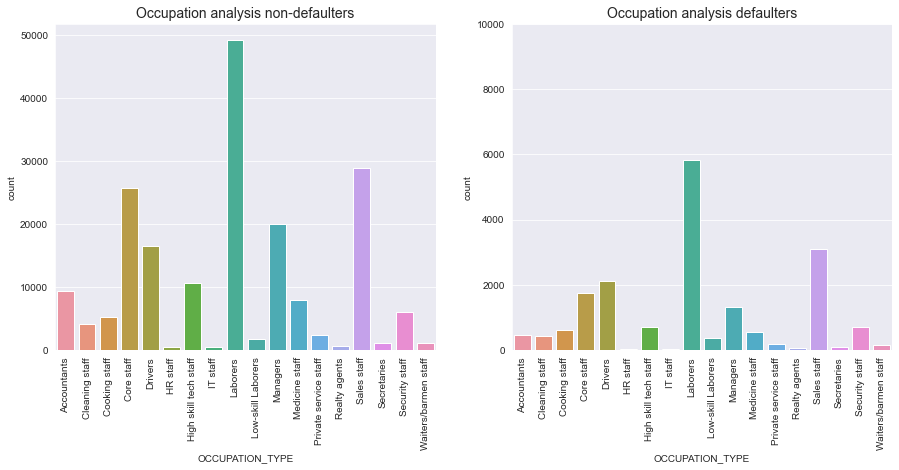

In [127]:
#Analysis by occupation

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.countplot(x = target_0["OCCUPATION_TYPE"])
plt.title("Occupation analysis non-defaulters",size=14)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x = target_1["OCCUPATION_TYPE"])
plt.ylim(0,10000)
plt.title("Occupation analysis defaulters",size=14)
plt.xticks(rotation=90)
plt.show()

`Inference`

- The most common Occupation Type among both defaulters and non-defaulters is of Laborers.
- Among non-defaulters, Sales staff and Core staff are the most common occupation.
- Among defaulters, Sales staff,Drivers and Waiters/bar staffe are the most common occupation.
- Low Skill Laborers have the highest percentage of defaulters. Followed by Drivers, Waiters/Bar men staff, and Security Staff.
- Accountants,High skill tech staff and Managers are the highest percentage of non-defaulters.

#### GENDER

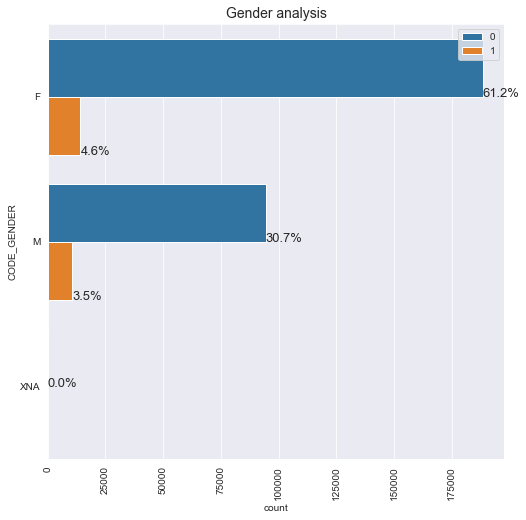

In [128]:
#Analysis by gender
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
gen=sns.countplot(y = "CODE_GENDER",hue="TARGET",data=app_data)
plt.title("Gender analysis",size=14)
plt.xticks(rotation=90)
for p in gen.patches:
    percentage='{:.1f}%'.format(100*p.get_width()/len(app_data),'.2f')
    y=p.get_y()+p.get_height()
    x=p.get_x()+p.get_width()-1.3
    gen.annotate(percentage,(x,y),size=13)
plt.legend(loc="upper right")
plt.show()

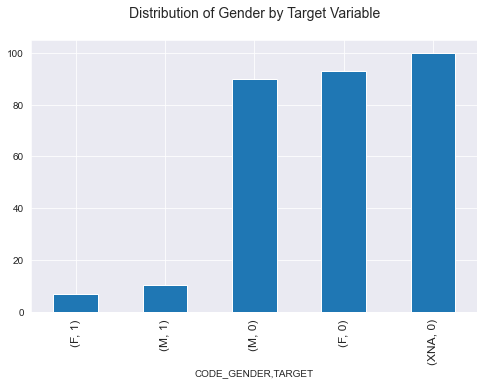

In [129]:
#distribution of gender grouped by target variable
plt.figure(figsize=(8,5))
((app_data.groupby(["CODE_GENDER"])['TARGET'].value_counts(normalize=True)*100).sort_values()).plot.bar()
plt.title("Distribution of Gender by Target Variable\n",size=14)
plt.xticks(size=12)
plt.show()

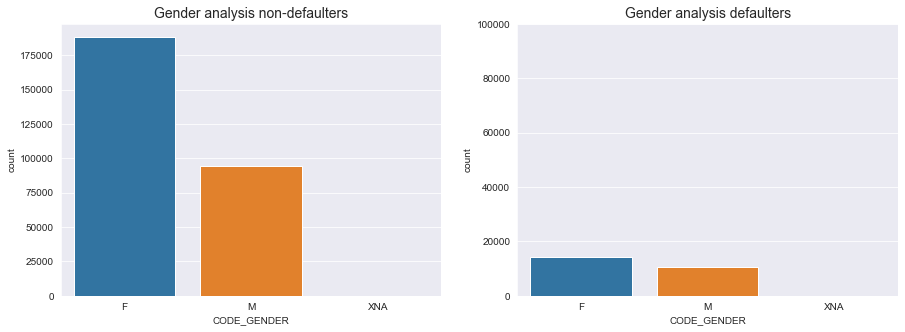

In [130]:
#Gender analysis

plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.countplot(x = target_0["CODE_GENDER"])
plt.title("Gender analysis non-defaulters",size=14)
plt.subplot(1,2,2)
sns.countplot(x = target_1["CODE_GENDER"])
plt.ylim(0,100000)
plt.title("Gender analysis defaulters",size=14)
plt.show()

`Inference`

- Almost 65% of the applicants are women. 
- Women are more likely to be non-defaulters.
- Among 8% of defaulters, men are more likely to be defaulters despite accounting for 35% of the total applicants.

#### INCOME TYPE

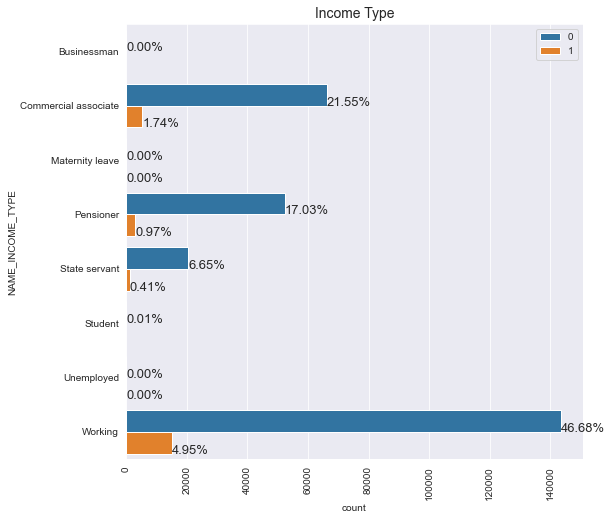

In [131]:
#Analysis by income type
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
inc=sns.countplot(y = "NAME_INCOME_TYPE",hue="TARGET",data=app_data)
plt.title("Income Type",size=14)
plt.xticks(rotation=90)
for p in inc.patches:
    percentage='{:.2f}%'.format(100*p.get_width()/len(app_data),'.2f')
    y=p.get_y()+p.get_height()
    x=p.get_x()+p.get_width()-1.3
    inc.annotate(percentage,(x,y),size=13)
plt.legend(loc="upper right")
plt.show()

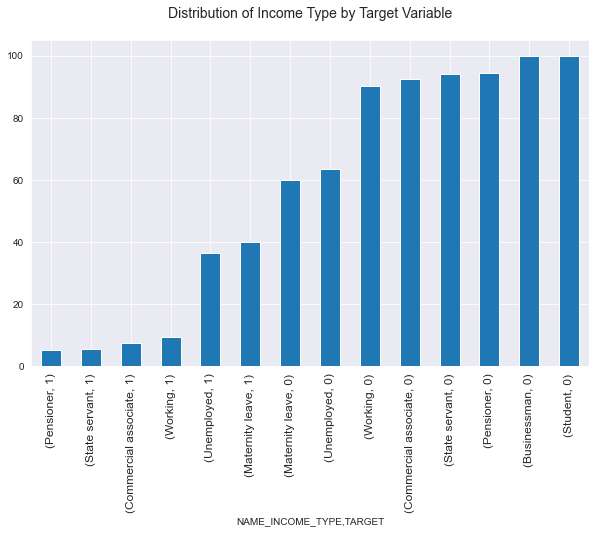

In [132]:
#distribution of income type grouped by target variable
plt.figure(figsize=(10,6))
((app_data.groupby(["NAME_INCOME_TYPE"])['TARGET'].value_counts(normalize=True)*100).sort_values()).plot.bar()
plt.title("Distribution of Income Type by Target Variable\n",size=14)
plt.xticks(size=12)
plt.show()

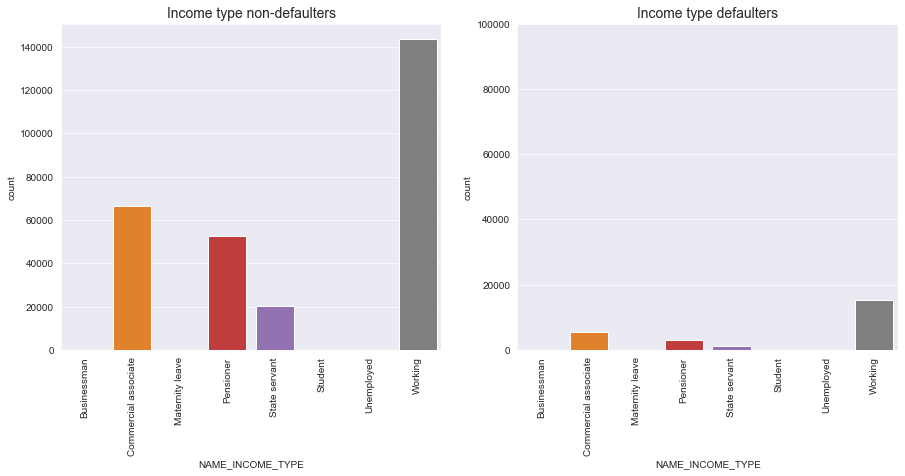

In [133]:
#Income type analysis

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.countplot(x = target_0["NAME_INCOME_TYPE"])
plt.title("Income type non-defaulters",size=14)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x = target_1["NAME_INCOME_TYPE"])
plt.ylim(0,100000)
plt.title("Income type defaulters",size=14)
plt.xticks(rotation=90)
plt.show()

`Inference`

- The most common income type among both groups are(highest to lowest):
 - Working 
 - Commerical associate
 - Pensioner
 - State servants
- There are no defaulters who are Students and Businessmen among the applicants, also the number of applicants of these income types are below 50 applicants.
- Pensioners are the most likely (in that order) to be non-defaulters despite being the third most common group.

#### FAMILY STATUS

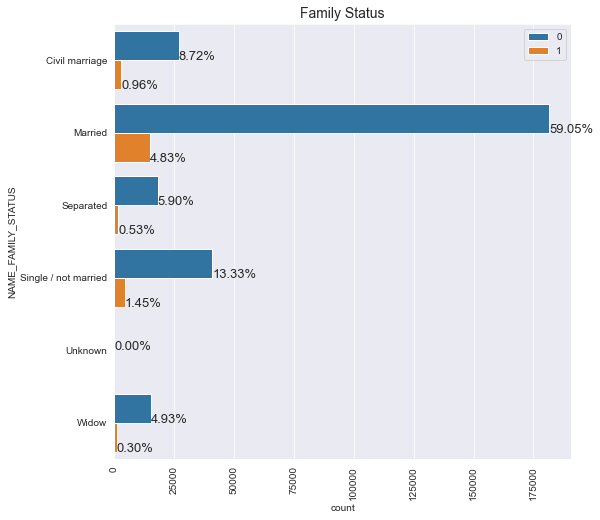

In [134]:
#Analysis by family status 
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
fam=sns.countplot(y = "NAME_FAMILY_STATUS",hue="TARGET",data=app_data)
plt.title("Family Status",size=14)
plt.xticks(rotation=90)
for p in fam.patches:
    percentage='{:.2f}%'.format(100*p.get_width()/len(app_data),'.2f')
    y=p.get_y()+p.get_height()
    x=p.get_x()+p.get_width()-1.3
    fam.annotate(percentage,(x,y),size=13)
plt.legend(loc="upper right")
plt.show()

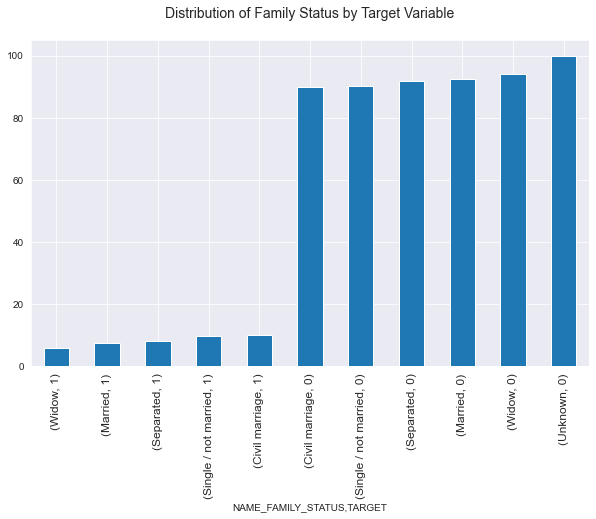

In [135]:
#distribution of family status grouped by target variable
plt.figure(figsize=(10,6))
((app_data.groupby(["NAME_FAMILY_STATUS"])['TARGET'].value_counts(normalize=True)*100).sort_values()).plot.bar()
plt.title("Distribution of Family Status by Target Variable\n",size=14)
plt.xticks(size=12)
plt.show()

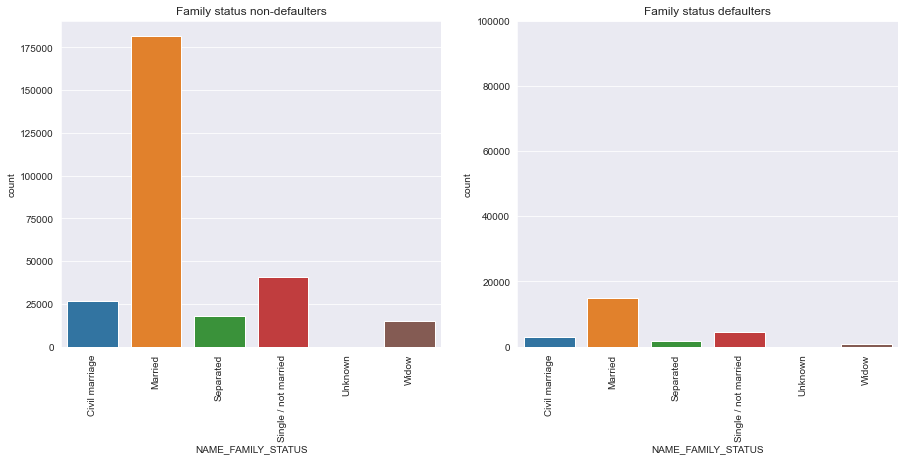

In [136]:
#Family status analysis

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.countplot(x = target_0["NAME_FAMILY_STATUS"])
plt.title("Family status non-defaulters",size=12)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x = target_1["NAME_FAMILY_STATUS"])
plt.ylim(0,100000)
plt.title("Family status defaulters",size=12)
plt.xticks(rotation=90)
plt.show()

`Inference`

- The most common family status are Married, then Single/Not Married among both defaulters and non-defaulters.
- Widows, and Married are the most likely to be non-defaulters(in that order).
- Civil marriage and Single/Not married are most likely to default.

#### EDUCATION TYPE

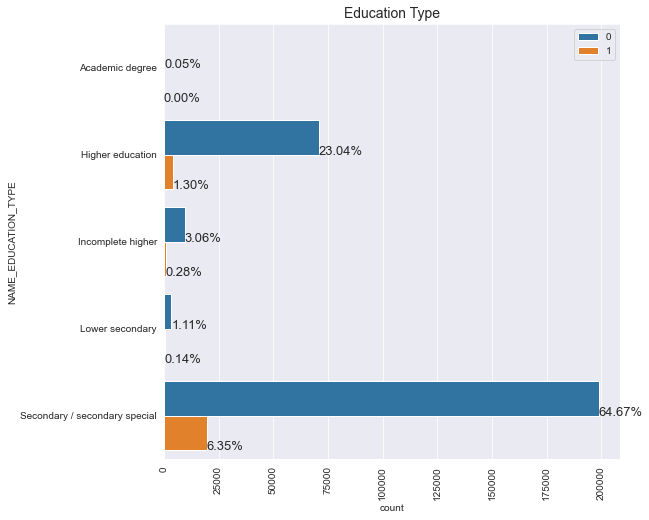

In [137]:
#Analysis by education type
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
edu=sns.countplot(y = "NAME_EDUCATION_TYPE",hue="TARGET",data=app_data)
plt.title("Education Type",size=14)
plt.xticks(rotation=90)
for p in edu.patches:
    percentage='{:.2f}%'.format(100*p.get_width()/len(app_data),'.2f')
    y=p.get_y()+p.get_height()
    x=p.get_x()+p.get_width()-1.3
    edu.annotate(percentage,(x,y),size=13)
plt.legend(loc="upper right")
plt.show()

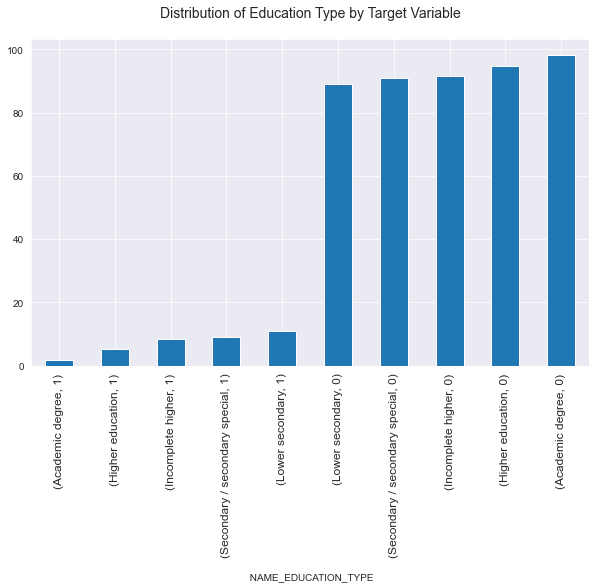

In [138]:
#distribution of education type grouped by target variable
plt.figure(figsize=(10,6))
((app_data.groupby(["NAME_EDUCATION_TYPE"])['TARGET'].value_counts(normalize=True)*100).sort_values()).plot.bar()
plt.title("Distribution of Education Type by Target Variable\n",size=14)
plt.xticks(size=12)
plt.xlabel("\n NAME_EDUCATION_TYPE")
plt.show()

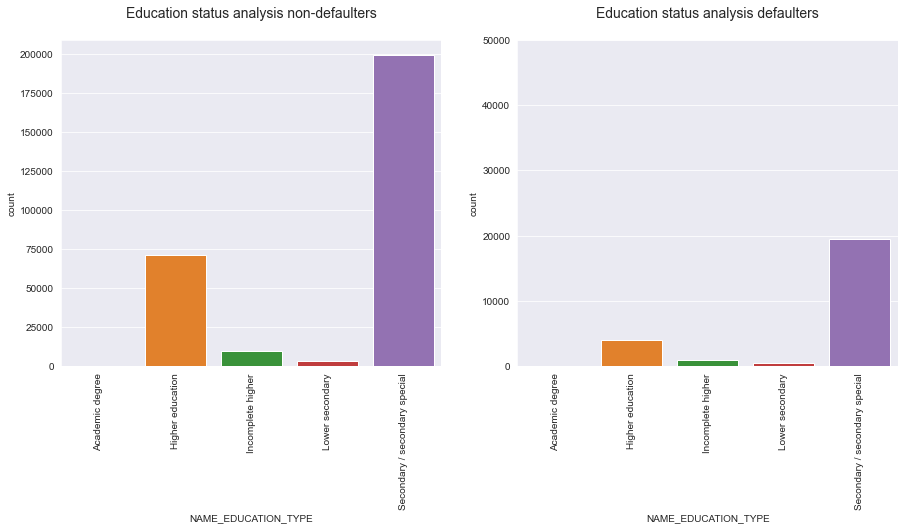

In [139]:
#Education status analysis

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.countplot(x = target_0["NAME_EDUCATION_TYPE"])
plt.title("Education status analysis non-defaulters\n",size=14)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x = target_1["NAME_EDUCATION_TYPE"])
plt.ylim(0,50000)
plt.title("Education status analysis defaulters\n",size=14)
plt.xticks(rotation=90)
plt.show()

`Inference`

- The most common education type among all applicants is Secondary/Secondary special. Followerd by Higher education.
- Applicants with academic degrees are the smallest percentage of loan applicants. And also the least likely to default, folloed by Higher education type.
- The most likely to default are Lower Secondary and Secondary/Secondary Special education types.


#### HOUSING TYPE

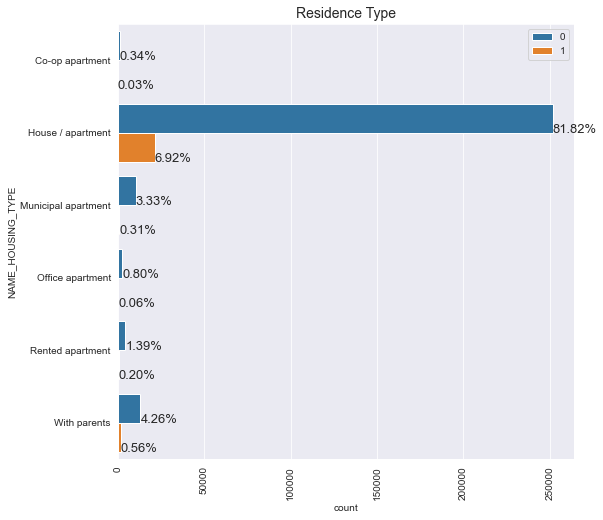

In [140]:
#Analysis by housing type
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
res=sns.countplot(y = "NAME_HOUSING_TYPE",hue="TARGET",data=app_data)
plt.title("Residence Type",size=14)
plt.xticks(rotation=90)
for p in res.patches:
    percentage='{:.2f}%'.format(100*p.get_width()/len(app_data),'.2f')
    y=p.get_y()+p.get_height()
    x=p.get_x()+p.get_width()-1.3
    res.annotate(percentage,(x,y),size=13)
plt.legend(loc="upper right")
plt.show()

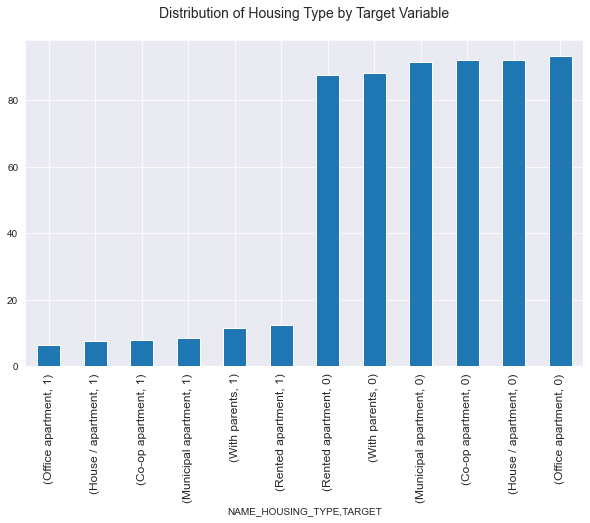

In [141]:
#distribution of Housing type grouped by target variable
plt.figure(figsize=(10,6))
((app_data.groupby(["NAME_HOUSING_TYPE"])['TARGET'].value_counts(normalize=True)*100).sort_values()).plot.bar()
plt.title("Distribution of Housing Type by Target Variable\n",size=14)
plt.xticks(size=12)
plt.show()

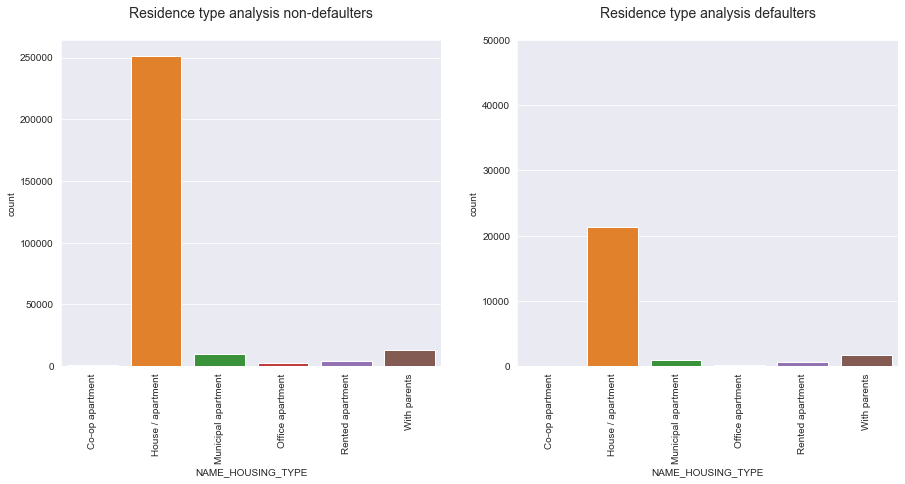

In [142]:
#Residence type analysis

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.countplot(x = target_0["NAME_HOUSING_TYPE"])
plt.title("Residence type analysis non-defaulters\n",size=14)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x = target_1["NAME_HOUSING_TYPE"])
plt.ylim(0,50000)
plt.title("Residence type analysis defaulters\n",size=14)
plt.xticks(rotation=90)
plt.show()

`Inference`

- The most common housing type among the applicants are House/Apartmnet and With Parents.
- The most likely to default are Rented Apartment and With Parents housing types.
- Least likely to be deafulters are Office Apartment and House/Apartment types.

### Numerical Univariate Analysis

#### EXT_SOURCE_2 & 3

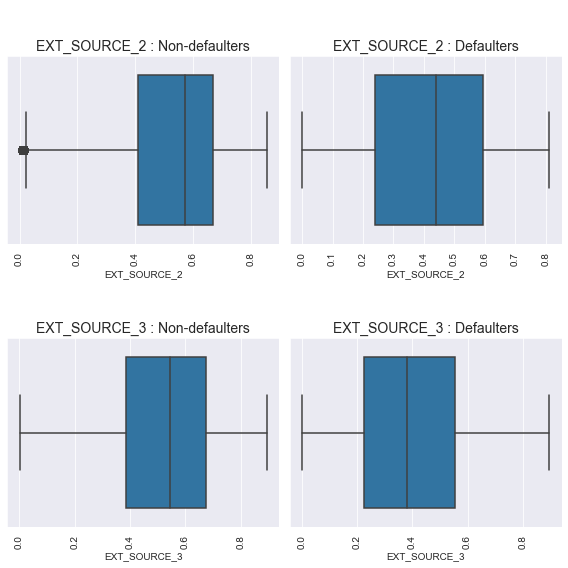

In [143]:
#External Source boxplot

plt.figure(figsize=[8,8])
plt.subplot(2,2,1)
sns.boxplot(x = target_0["EXT_SOURCE_2"])
plt.title("EXT_SOURCE_2 : Non-defaulters",size=14)
plt.xticks(rotation=90)
plt.subplot(2,2,2)
sns.boxplot(x = target_1["EXT_SOURCE_2"])
plt.title("\n\nEXT_SOURCE_2 : Defaulters",size=14)
plt.xticks(rotation=90)
plt.subplot(2,2,3)
sns.boxplot(x = target_0["EXT_SOURCE_3"])
plt.title("EXT_SOURCE_3 : Non-defaulters",size=14)
plt.xticks(rotation=90)
plt.subplot(2,2,4)
sns.boxplot(x = target_1["EXT_SOURCE_3"])
plt.title("\n\nEXT_SOURCE_3 : Defaulters",size=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

`Inference`

- EXT_SOURCE_2:Defaulters have lower median score of 0.45 and a wider distribution ranging from a low 0.2 score.
- EXT_SOURCE_3:Defaulters have a lower median value less than 0.4 and a wider dsitribution also ranging from a low 0.2 to 0.6.

#### COUNT OF CHILDREN

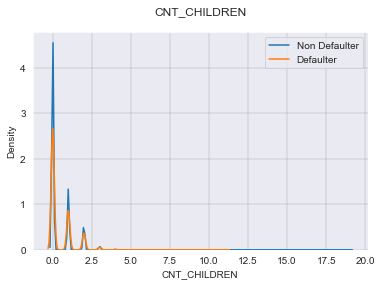

In [144]:
#Count of Children distribution

sns.distplot(target_0['CNT_CHILDREN'], hist = False, label="Non Defaulter") 
sns.distplot(target_1['CNT_CHILDREN'], hist = False, label='Defaulter')
plt.title('CNT_CHILDREN\n',size=12)
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.legend()
plt.show()

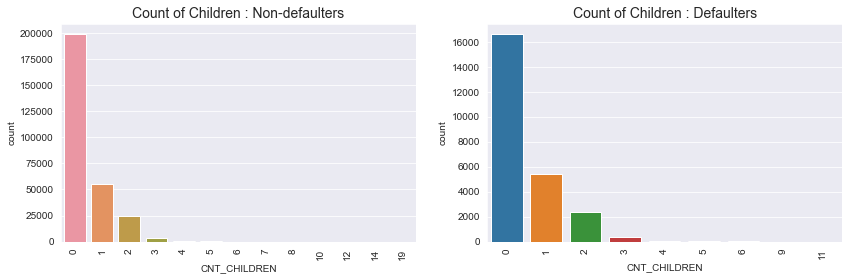

In [145]:
#Count of Children analysis

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
sns.countplot(x = target_0["CNT_CHILDREN"])
plt.title("Count of Children : Non-defaulters",size=14)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x = target_1["CNT_CHILDREN"])
plt.title("Count of Children : Defaulters",size=14)
plt.xticks(rotation=90)
plt.show()

`Inference`

- Most applicants have no children.
- Applicants with more than 3 children are more likely to default.

#### COUNT OF FAMILY MEMBERS

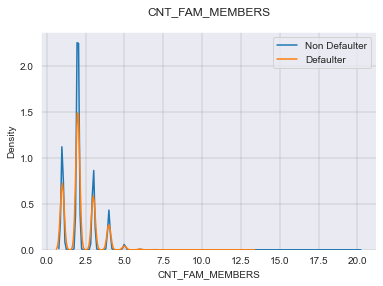

In [146]:
#Amount credit distribution

sns.distplot(target_0['CNT_FAM_MEMBERS'], hist = False, label="Non Defaulter") 
sns.distplot(target_1['CNT_FAM_MEMBERS'], hist = False, label='Defaulter')
plt.title('CNT_FAM_MEMBERS\n',size=12)
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.legend()
plt.show()

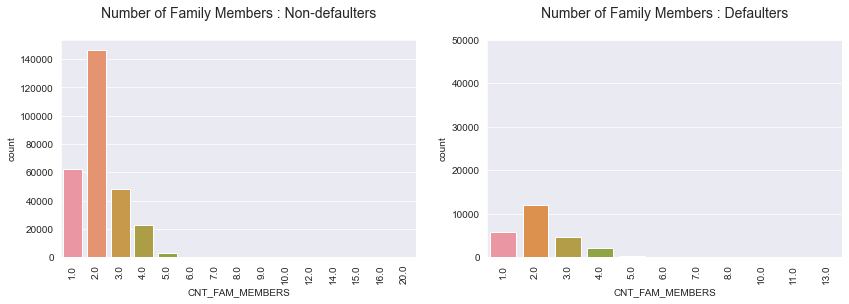

In [147]:
#Count family members type analysis

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
sns.countplot(x = target_0["CNT_FAM_MEMBERS"])
plt.title("Number of Family Members : Non-defaulters\n",size=14)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x = target_1["CNT_FAM_MEMBERS"])
plt.ylim(0,50000)
plt.title("Number of Family Members : Defaulters\n",size=14)
plt.xticks(rotation=90)
plt.show()

`Inference`

- Most applicants have 2 family members, with over 95% applicants having less than 4 family members.
- As the number of family members increases beyong 3-4 members, the applicant is more likely to default.

#### AMOUNT CREDIT

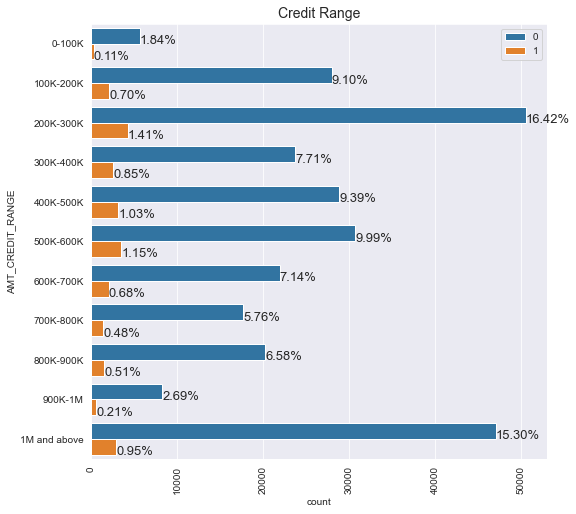

In [148]:
#Analysis by credit range
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
cre=sns.countplot(y = "AMT_CREDIT_RANGE",hue="TARGET",data=app_data)
plt.title("Credit Range",size=14)
plt.xticks(rotation=90)
for p in cre.patches:
    percentage='{:.2f}%'.format(100*p.get_width()/len(app_data),'.2f')
    y=p.get_y()+p.get_height()
    x=p.get_x()+p.get_width()-1.3
    cre.annotate(percentage,(x,y),size=13)
plt.legend(loc="upper right")
plt.show()

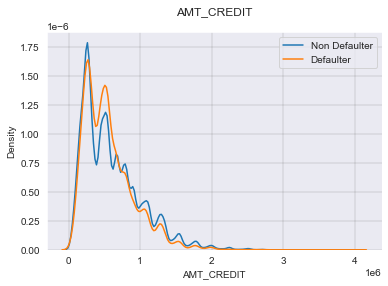

In [149]:
#Amount credit distribution

sns.distplot(target_0['AMT_CREDIT'], hist = False, label="Non Defaulter") 
sns.distplot(target_1['AMT_CREDIT'], hist = False, label='Defaulter')
plt.title('AMT_CREDIT\n',size=12)
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.legend()
plt.show()

#### AMOUNT ANNUITY

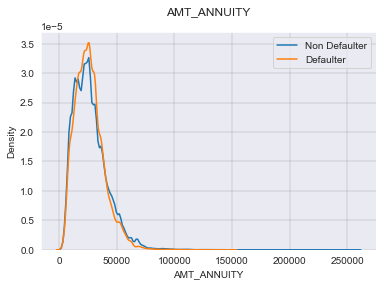

In [150]:
#Amount annuity distribution

sns.distplot(target_0['AMT_ANNUITY'], hist = False, label="Non Defaulter")
sns.distplot(target_1['AMT_ANNUITY'], hist = False, label="Defaulter")
plt.title('AMT_ANNUITY\n',size=12)
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.legend()
plt.show()

#### AMOUNT GOODS PRICE

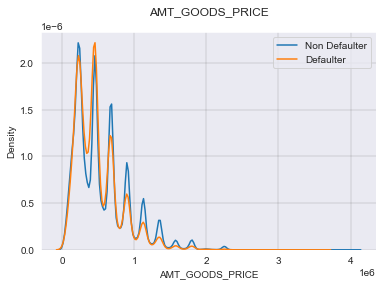

In [151]:
#Goods price analysis

sns.distplot(target_0['AMT_GOODS_PRICE'], hist = False,label= "Non Defaulter")
sns.distplot(target_1['AMT_GOODS_PRICE'], hist = False, label="Defaulter")
plt.title('AMT_GOODS_PRICE\n',size=12)
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.legend()
plt.show()

`Inference`

According to the above distributions:
- The majority of applicants have taken a credit loan amount less than 1 million. Between 200-600K applicants are more likely to default with 500-600K being the credit range with highest percentage of defaulters.
- The Amount Annuity paid by most applicants is less than 75,000, with majority below 50,000.
- These columns are highly correlated. Most defaulters have AMT_ANNUITY below 150,000.There are fewer defaulters with AMT_ANNUITY > 150,000.
- The majority of the distribution of Goods Price among applicants is less than 1,000,000.

### Numerical Bivariate Analysis

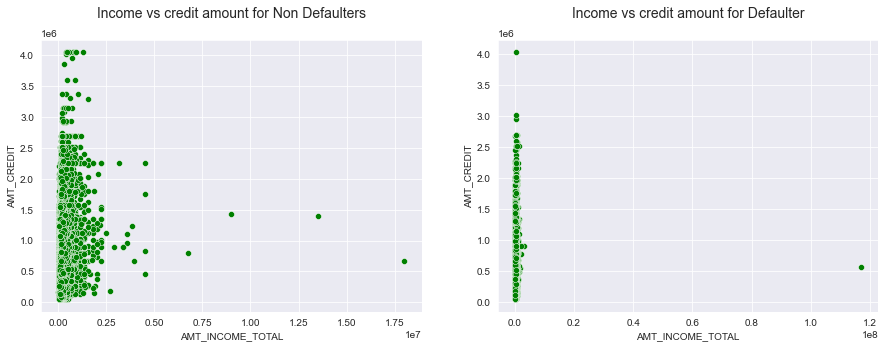

In [152]:
#Income vs credit amount 
sns.set_style("darkgrid")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(target_0["AMT_INCOME_TOTAL"],target_0["AMT_CREDIT"],color='Green')
plt.title("Income vs credit amount for Non Defaulters\n",size=14)

plt.subplot(1,2,2)
sns.scatterplot(target_1["AMT_INCOME_TOTAL"],target_1["AMT_CREDIT"],color='Green')
plt.title("Income vs credit amount for Defaulter\n",size=14)
plt.show()

#### GOODS PRICE vs CREDIT AMOUNT

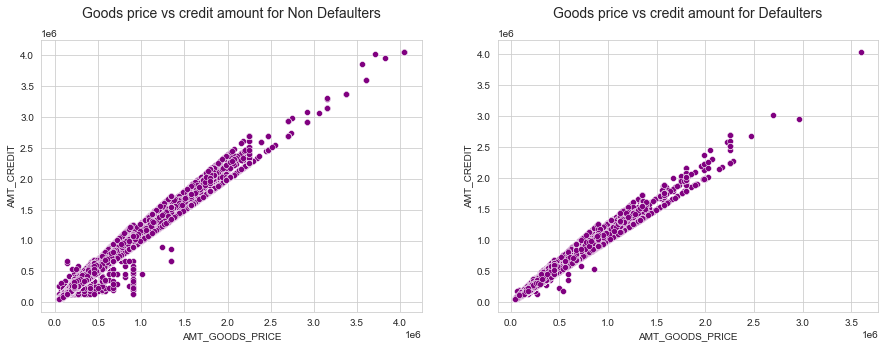

In [153]:
#Goods price vs credit amount

sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(target_0["AMT_GOODS_PRICE"],target_0["AMT_CREDIT"],color="purple")
plt.title("Goods price vs credit amount for Non Defaulters\n",size=14)

plt.subplot(1,2,2)
sns.scatterplot(target_1["AMT_GOODS_PRICE"],target_1["AMT_CREDIT"],color="purple")
plt.title("Goods price vs credit amount for Defaulters\n",size=14)
plt.show()

`Inference`

- Applicants with higher credit loans are more common and widespread among non defaulters
- Non-defaulters who have higher goods price have higher credit loans.

#### INCOME vs GENDER

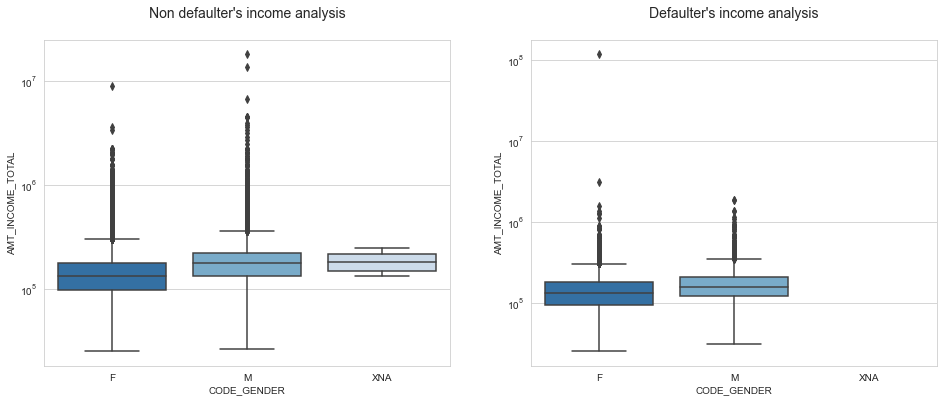

In [154]:
#Comparing total income for male and female clients

sns.set_style("whitegrid")
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(x=target_0["CODE_GENDER"],y=target_0["AMT_INCOME_TOTAL"],orient="v",palette="Blues_r",whis=1.5,fliersize=5)
plt.yscale("log")
plt.title("Non defaulter's income analysis\n",size=14)

plt.subplot(1,2,2)
sns.boxplot(x=target_1["CODE_GENDER"],y=target_1["AMT_INCOME_TOTAL"],orient="v",palette="Blues_r",whis=1.5,fliersize=5)
plt.yscale("log")
plt.title("Defaulter's income analysis\n",size=14)
plt.show()

#### CREDIT AMOUNT vs GENDER

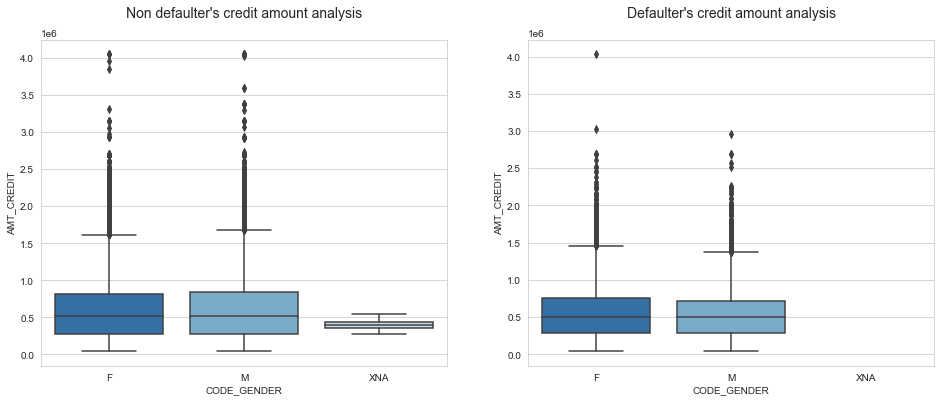

In [155]:
#Comparing credit amount for both genders

sns.set_style("whitegrid")
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(x=target_0["CODE_GENDER"],y=target_0["AMT_CREDIT"],orient="v",palette="Blues_r",whis=1.5,fliersize=5)
#plt.yscale("log")
plt.title("Non defaulter's credit amount analysis\n",size=14)

plt.subplot(1,2,2)
sns.boxplot(x=target_1["CODE_GENDER"],y=target_1["AMT_CREDIT"],orient="v",palette="Blues_r",whis=1.5,fliersize=5)
#plt.yscale("log")
plt.title("Defaulter's credit amount analysis\n",size=14)
plt.show()

`Inference`

It seems that the male clients are having higher income than females. But as previously observed here, we saw that the female clients are more in number than the male clients.

The credit amount for both male and female clients are approximately equal for both defaulters and non defaulters. In the case of defaulters, the credit amount for females seems a little higher.

So as a suggestion, it can be inferred that the organisation should target male clients with higher income as there is a very high possibility for them to go for higher credits leading towards profitability of the organization. 

#### AGE vs INCOME

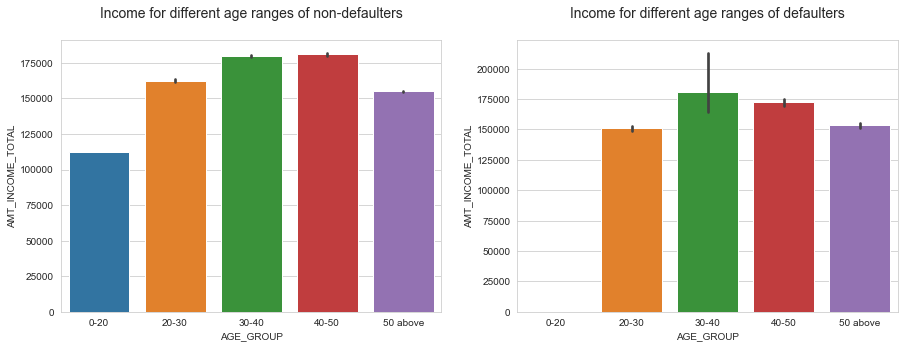

In [156]:
#Age range vs Income analysis

sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x=target_0["AGE_GROUP"],y=target_0["AMT_INCOME_TOTAL"])
plt.title("Income for different age ranges of non-defaulters\n",size=14)

plt.subplot(1,2,2)
sns.barplot(x=target_1["AGE_GROUP"],y=target_1["AMT_INCOME_TOTAL"])
plt.title("Income for different age ranges of defaulters\n",size=14)

plt.show()

`Inference`

- The 30-40 age group has the highest percentage of defaulters while having the highest income.
- Those with 40-50 have the highest percentage of non-defaulters and higher income range compared to other age groups.

#### EDUCATION vs INCOME

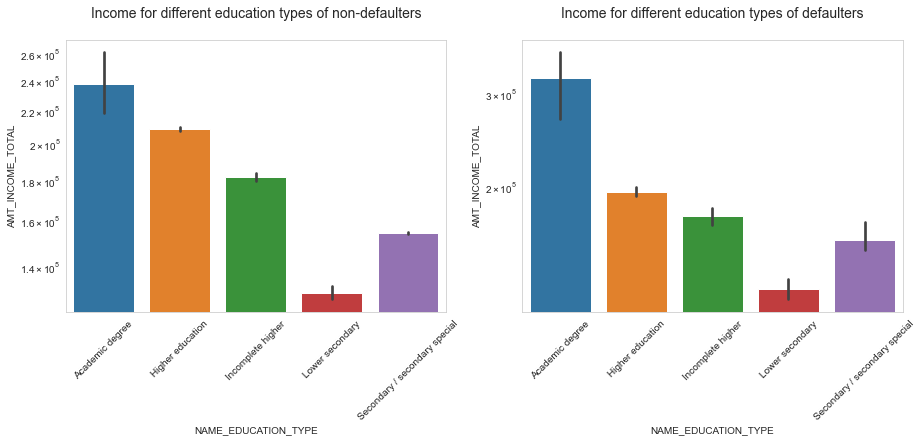

In [157]:
#Education status vs Income

sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x=target_0["NAME_EDUCATION_TYPE"],y=target_0["AMT_INCOME_TOTAL"])
plt.yscale("log")
plt.xticks(rotation=45)
plt.title("Income for different education types of non-defaulters\n",size=14)

plt.subplot(1,2,2)
sns.barplot(x=target_1["NAME_EDUCATION_TYPE"],y=target_1["AMT_INCOME_TOTAL"])
plt.yscale("log")
plt.xticks(rotation=45)
plt.title("Income for different education types of defaulters\n",size=14)

plt.show()

#### EDUCATION vs CREDIT AMOUNT

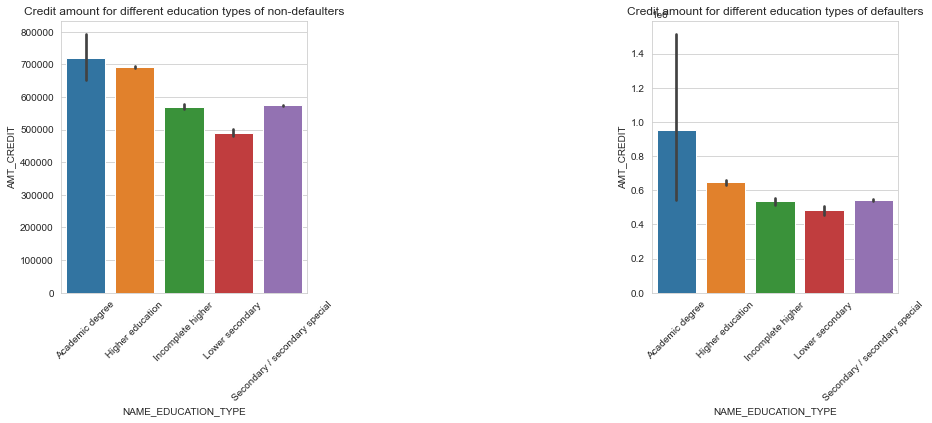

In [158]:
#Education status vs Credit amount

sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(x=target_0["NAME_EDUCATION_TYPE"],y=target_0["AMT_CREDIT"])
plt.xticks(rotation=45)
plt.title("Credit amount for different education types of non-defaulters")

plt.subplot(1,3,3)
sns.barplot(x=target_1["NAME_EDUCATION_TYPE"],y=target_1["AMT_CREDIT"])
plt.xticks(rotation=45)
plt.title("Credit amount for different education types of defaulters")

plt.show()

#### OCCUPATION vs CREDIT AMOUNT

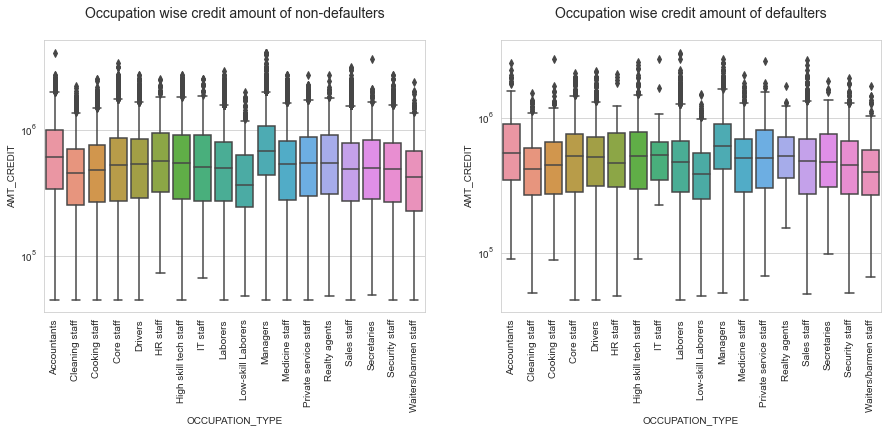

In [159]:
#Occupation type vs Credit amount

sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x=target_0["OCCUPATION_TYPE"],y=target_0["AMT_CREDIT"])
plt.yscale("log")
#plt.ylim(0,7)
plt.xticks(rotation=90)
plt.title("Occupation wise credit amount of non-defaulters\n",size=14)

plt.subplot(1,2,2)
sns.boxplot(x=target_1["OCCUPATION_TYPE"],y=target_1["AMT_CREDIT"])
plt.yscale("log")
#plt.ylim(0,7)
plt.xticks(rotation=90)
plt.title("Occupation wise credit amount of defaulters\n",size=14)

plt.show()

#### OCCUPATION vs INCOME

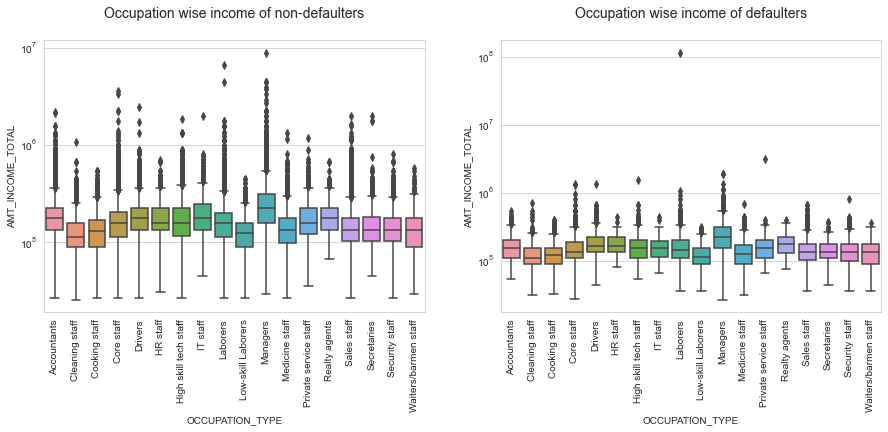

In [160]:
#Occupation type vs Income

sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x=target_0["OCCUPATION_TYPE"],y=target_0["AMT_INCOME_TOTAL"])
plt.yscale("log")
#plt.ylim(0,7)
plt.xticks(rotation=90)
plt.title("Occupation wise income of non-defaulters\n",size=14)

plt.subplot(1,2,2)
sns.boxplot(x=target_1["OCCUPATION_TYPE"],y=target_1["AMT_INCOME_TOTAL"])
plt.yscale("log")
#plt.ylim(0,7)
plt.xticks(rotation=90)
plt.title("Occupation wise income of defaulters\n",size=14)

plt.show()

`Inference`

From the above visualisations, we can conclude that the people between age range of 40-50 with an academic degree are taking greater amount of loans and paying on time. Also mostly of occupation type managers are able to repay the loan on time.

### Correlation Matrix

In [161]:
#columns used for correlation
corr_col=['NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'DEF_60_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3']

In [162]:
#splitting target 0 and 1 dataframes on correlation columns 
target0_df=target_0.loc[:,corr_col]
target1_df=target_1.loc[:,corr_col]

In [163]:
# Getting the top 10 correlation for the Non Defaulters data
targ_0_corr = target0_df.corr()
targ_0_corr=targ_0_corr.where(np.triu(np.ones(targ_0_corr.shape),k=1).astype(np.bool))
corr_targ0=targ_0_corr.unstack().reset_index()
corr_targ0.columns=['VAR1','VAR2','Correlation']
corr_targ0.dropna(subset=["Correlation"],inplace=True)
corr_targ0['Correlation']=corr_targ0['Correlation'].abs()
corr_targ0.sort_values(by="Correlation",ascending=False,inplace=True)
corr_targ0.head(10)

,VAR1,VAR2,Correlation
66,AMT_GOODS_PRICE,AMT_CREDIT,0.987250
160,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
67,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686
50,AMT_ANNUITY,AMT_CREDIT,0.771309
49,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953
118,DAYS_EMPLOYED,DAYS_BIRTH,0.352662
65,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462
33,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799
96,DAYS_BIRTH,CNT_CHILDREN,0.336966
134,DAYS_REGISTRATION,DAYS_BIRTH,0.333151


In [ ]:
#heatmap for non defaulter correlation
plt.figure(figsize=(11,7))
plt.title("\nCorrelation of variables among Non Defaulters\n",size=20)
sns.heatmap(target0_df.corr(),cmap="YlGnBu",linewidth=2,annot=True,fmt='.1f')
plt.show()

In [165]:
# Getting the top 10 correlation for the Defaulters data
targ_1_corr=target1_df.corr()
targ_1_corr = targ_1_corr.where(np.triu(np.ones(targ_1_corr.shape),k=1).astype(np.bool))
corr_targ1 = targ_1_corr.unstack().reset_index()
corr_targ1.columns =['VAR1','VAR2','Correlation']
corr_targ1.dropna(subset = ["Correlation"], inplace = True)
corr_targ1["Correlation"]=corr_targ1["Correlation"].abs() 
corr_targ1.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_targ1.head(10)

,VAR1,VAR2,Correlation
66,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
160,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
67,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699
50,AMT_ANNUITY,AMT_CREDIT,0.752195
118,DAYS_EMPLOYED,DAYS_BIRTH,0.307018
134,DAYS_REGISTRATION,DAYS_BIRTH,0.289114
220,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,0.264159
96,DAYS_BIRTH,CNT_CHILDREN,0.259109
150,DAYS_ID_PUBLISH,DAYS_BIRTH,0.252863
166,CNT_FAM_MEMBERS,DAYS_BIRTH,0.203267


Inference


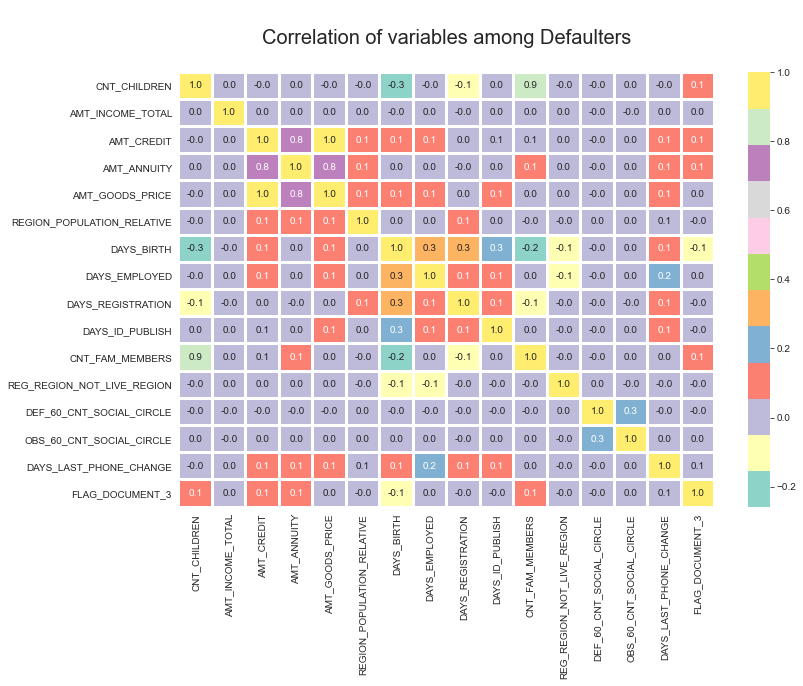

In [166]:
#heatmap for defaulter correlation
plt.figure(figsize=(12,8))
plt.title("\nCorrelation of variables among Defaulters\n",size=20)
sns.heatmap(target1_df.corr(),cmap="Set3",linewidth=2,annot=True,fmt='.1f')
plt.show()

The variables with positive correlation (above 0.4) among both defaulters and non-defaulters are:
- AMT_CREDIT
- AMT_GOODS_PRICE
- AMT_ANNUITY
- CNT_CHILDREN
- CNT_FAM_MEMBERS
- AMT_INCOME_TOTAL

## Merged Dataframe Analysis

In [5]:
merged_df=pd.merge(app_data,prev_app,how="inner",on=['SK_ID_CURR'])
merged_df.shape

(1413701, 158)

In [168]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 68 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  category
 3   CODE_GENDER                  1413701 non-null  category
 4   FLAG_OWN_CAR                 1413701 non-null  category
 5   FLAG_OWN_REALTY              1413701 non-null  category
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_x                 1413701 non-null  float64 
 9   AMT_ANNUITY_x                1413608 non-null  float64 
 10  AMT_GOODS_PRICE_x            1412493 non-null  float64 
 11  NAME_TYPE_SUITE_x            1410175 non-null  category
 12  NAME_INCOME_TYPE            

In [169]:
merged_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AGE,YEARS_EMPLOYED,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413608e+06,1.412493e+06,1.413701e+06,1.413701e+06,1.140118e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.411880e+06,1.171859e+06,1.410555e+06,1.410555e+06,1.410555e+06,1.410555e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.140118e+06,1.413701e+06,1.106483e+06,1.413701e+06,1.413700e+06,1.094176e+06,1.413701e+06,1.413701e+06,1.106488e+06
mean,2.784813e+05,8.655296e-02,4.048933e-01,1.733160e+05,5.875537e+05,2.701702e+04,5.277186e+05,2.074985e-02,1.632105e+04,2.456019e+03,5.003233e+03,3.034563e+03,2.150501e+00,1.207327e-02,5.114275e-01,4.896986e-01,1.544176e+00,1.540436e-01,1.526303e+00,1.080426e-01,1.084701e+03,7.385600e-01,4.421384e+01,6.233826e+00,1.922744e+06,1.583718e+04,1.752436e+05,1.963541e+05,2.264512e+05,8.803670e+02,3.149878e+02,1.605194e+01
std,1.028118e+05,2.811789e-01,7.173454e-01,1.985734e+05,3.849173e+05,1.395116e+04,3.532465e+05,1.334702e-02,4.344557e+03,2.314548e+03,3.551051e+03,1.507376e+03,9.006787e-01,1.092132e-01,1.911188e-01,1.965360e-01,2.530715e+00,4.658973e-01,2.508953e+00,3.790588e-01,7.999369e+02,4.394192e-01,1.190217e+01,6.350317e+00,5.327153e+05,1.472491e+04,2.936222e+05,3.194813e+05,3.159376e+05,7.835402e+02,7.695082e+03,1.456675e+01
min,1.000020e+05,0.000000e+00,0.000000e+00,2.565000e+04,4.500000e+04,1.615500e+03,4.050000e+04,2.900000e-04,7.489000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,8.173617e-08,5.272652e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00
25%,1.893640e+05,0.000000e+00,0.000000e+00,1.125000e+05,2.700000e+05,1.682100e+04,2.385000e+05,1.003200e-02,1.273900e+04,8.450000e+02,2.001000e+03,1.783000e+03,2.000000e+00,0.000000e+00,3.890839e-01,3.441550e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.960000e+02,0.000000e+00,3.400000e+01,2.000000e+00,1.461346e+06,6.257858e+03,1.975050e+04,2.488050e+04,4.982850e+04,2.710000e+02,-1.000000e+00,6.000000e+00
50%,2.789920e+05,0.000000e+00,0.000000e+00,1.575000e+05,5.084955e+05,2.492550e+04,4.500000e+05,1.885000e-02,1.604400e+04,1.761000e+03,4.508000e+03,3.330000e+03,2.000000e+00,0.000000e+00,5.627679e-01,5.100895e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.011000e+03,1.000000e+00,4.300000e+01,4.000000e+00,1.922698e+06,1.122376e+04,7.087050e+04,8.059500e+04,1.102455e+05,5.820000e+02,4.000000e+00,1.200000e+01
75%,3.675560e+05,0.000000e+00,1.000000e+00,2.070000e+05,8.079840e+05,3.454200e+04,6.795000e+05,2.866300e-02,1.998000e+04,3.256000e+03,7.510000e+03,4.319000e+03,3.000000e+00,0.000000e+00,6.606783e-01,6.479769e-01,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,1.683000e+03,1.000000e+00,5.400000e+01,8.000000e+00,2.384012e+06,2.042078e+04,1.800000e+05,2.156400e+05,2.295000e+05,1.313000e+03,8.500000e+01,2.400000e+01
max,4.562550e+05,1.000000e+00,1.900000e+01,1.170000e+08,4.050000e+06,2.250000e+05,4.050000e+06,7.250800e-02,2.520100e+04,1.791200e+04,2.467200e+04,7.197000e+03,2.000000e+01,1.000000e+00,8.549997e-01,8.960095e-01,3.480000e+02,3.400000e+01,3.440000e+02,2.400000e+01,4.292000e+03,1.000000e+00,6.900000e+01,4.900000e+01,2.845381e+06,4.180581e+05,5.850000e+06,4.509688e+06,5.850000e+06,2.922000e+03,4.000000e+06,8.400000e+01


In [6]:
merged_0=merged_df[merged_df["TARGET"]==0]
merged_1=merged_df[merged_df["TARGET"]==1]

### Merged Data Analysis

#### CASH LOAN PURPOSE

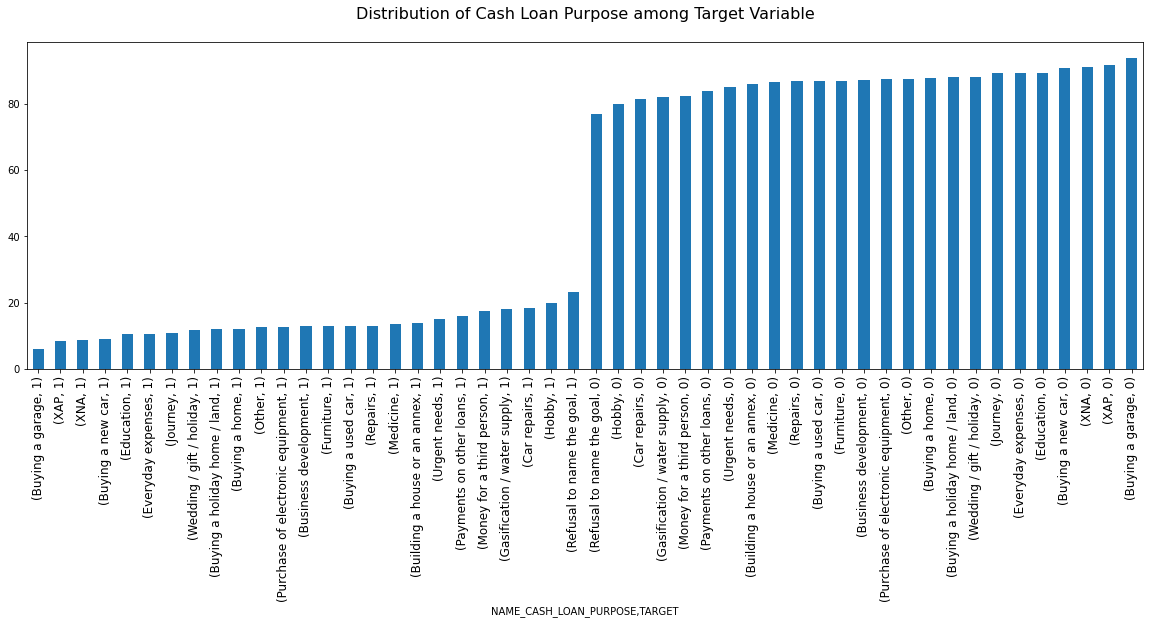

In [13]:
#Loan purpose distribution
plt.figure(figsize=(20,6))
((merged_df.groupby(["NAME_CASH_LOAN_PURPOSE"])['TARGET'].value_counts(normalize=True)*100).sort_values()).plot.bar()
plt.title("Distribution of Cash Loan Purpose among Target Variable\n",size=16)
plt.xticks(size=12)
plt.show()

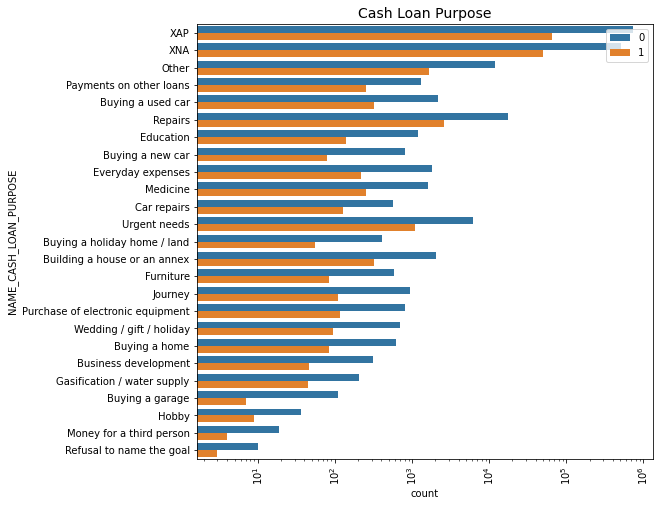

In [9]:
#Analysis by cash loan purpose
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
cre=sns.countplot(y = "NAME_CASH_LOAN_PURPOSE",hue="TARGET",data=merged_df)
plt.title("Cash Loan Purpose",size=14)
plt.xticks(rotation=90)
plt.xscale("log")
plt.legend(loc="upper right")
plt.show()

`Inference`

- Applicants whose Cash Loan Purpose is Car repairs, Urgent needs and  Hobbies have higher default percentage.
- Applicants with purpose as Buying a new garage,  Buying new car and Education have lowest deafult percentage.

#### CODE GENDER

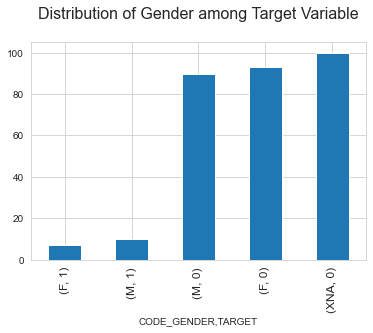

In [171]:
#gender distribution
plt.figure(figsize=(6,4))
((app_data.groupby(["CODE_GENDER"])['TARGET'].value_counts(normalize=True)*100).sort_values()).plot.bar()
plt.title("Distribution of Gender among Target Variable\n",size=16)
plt.xticks(size=12)
plt.show()

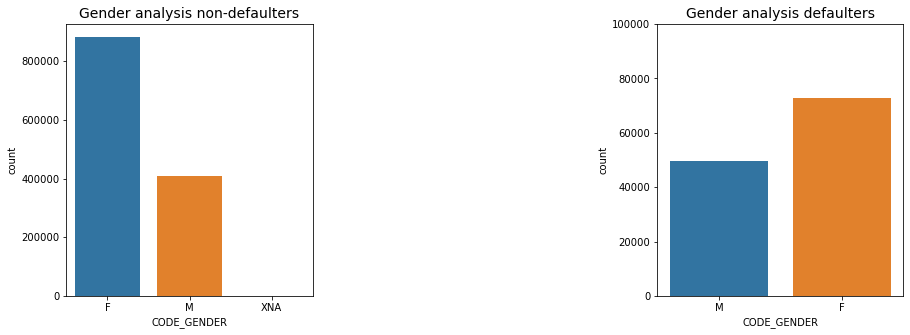

In [14]:
#Gender analysis on merged data

plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
sns.countplot(x = merged_0["CODE_GENDER"])
plt.title("Gender analysis non-defaulters",size=14)
plt.subplot(1,3,3)
sns.countplot(x = merged_1["CODE_GENDER"])
plt.ylim(0,100000)
plt.title("Gender analysis defaulters",size=14)
plt.show()

`Inference`

- Thought female loan applicants are higher than male applicants, male applicants are more likely to default.

#### OWN CAR

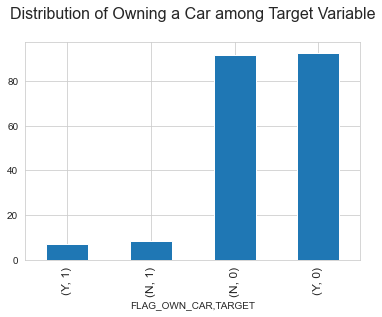

In [173]:
#flag own car distribution
plt.figure(figsize=(6,4))
((app_data.groupby(["FLAG_OWN_CAR"])['TARGET'].value_counts(normalize=True)*100).sort_values()).plot.bar()
plt.title("Distribution of Owning a Car among Target Variable\n",size=16)
plt.xticks(size=12)
plt.show()

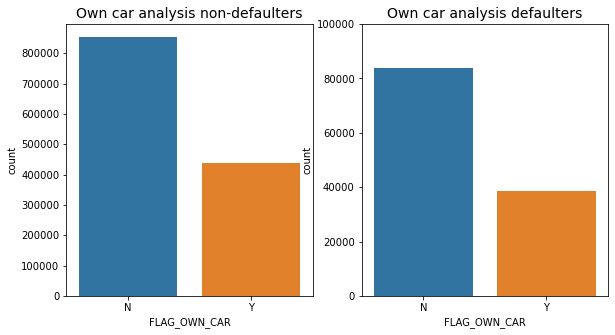

In [8]:
#Flag Own Car on merged data

plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
sns.countplot(x = merged_0["FLAG_OWN_CAR"])
plt.title("Own car analysis non-defaulters",size=14)
plt.subplot(1,3,3)
sns.countplot(x = merged_1["FLAG_OWN_CAR"])
plt.ylim(0,100000)
plt.title("Own car analysis defaulters",size=14)
plt.show()

#### OWN REALTY

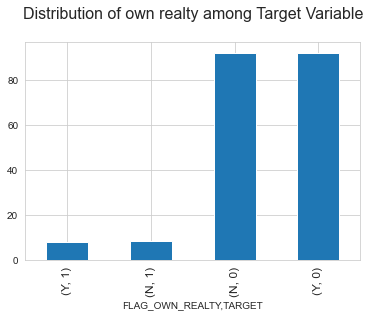

In [175]:
#flag own realty distribution
plt.figure(figsize=(6,4))
((app_data.groupby(["FLAG_OWN_REALTY"])['TARGET'].value_counts(normalize=True)*100).sort_values()).plot.bar()
plt.title("Distribution of own realty among Target Variable\n",size=16)
plt.xticks(size=12)
plt.show()

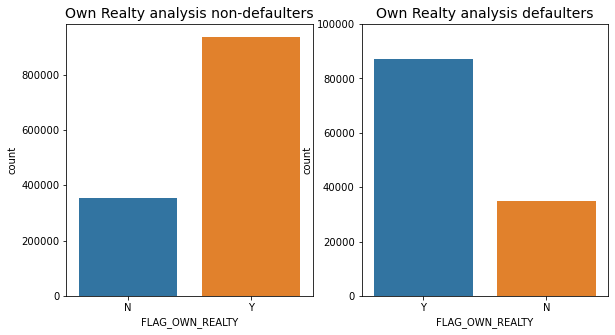

In [10]:
#Flag Own Realty on merged data

plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
sns.countplot(x = merged_0["FLAG_OWN_REALTY"])
plt.title("Own Realty analysis non-defaulters",size=14)
plt.subplot(1,3,2)
sns.countplot(x = merged_1["FLAG_OWN_REALTY"])
plt.ylim(0,100000)
plt.title("Own Realty analysis defaulters",size=14)
plt.show()

Inference:

- Most applicants do not own a car. Applicants without cars have a higher default pecentage.
- Applicants that own realty are more likely to be non-defaulters.

- Owning Realty is a high percentage for all applicanants.

- Applicants without own realty have a higher default percentage.

#### CONTRACT STATUS

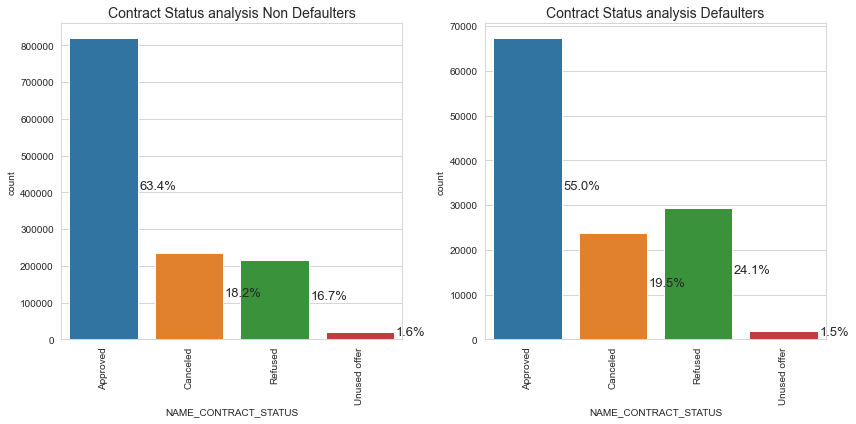

In [177]:
#countplot of name contract type for defaulters and non defaulter

plt.figure(figsize=[12,6])
plt.subplot(1,2,1)
cstatus0=sns.countplot(x = merged_0["NAME_CONTRACT_STATUS"])
plt.title("Contract Status analysis Non Defaulters",size=14)
plt.xticks(rotation=90)


for p in cstatus0.patches:
    percentage='{:.1f}%'.format(100*p.get_height()/len(merged_0),'.2f')
    x=p.get_x()+p.get_width()+0.02
    y=p.get_y()+p.get_height()/2
    cstatus0.annotate(percentage,(x,y),size=13)
    
plt.subplot(1,2,2)
cstatus1=sns.countplot(x = merged_1["NAME_CONTRACT_STATUS"])


for p in cstatus1.patches:
    percentage='{:.1f}%'.format(100*p.get_height()/len(merged_1),'.2f')
    x=p.get_x()+p.get_width()+0.02
    y=p.get_y()+p.get_height()/2
    cstatus1.annotate(percentage,(x,y),size=13)

plt.title("Contract Status analysis Defaulters",size=14)
plt.xticks(rotation=90)
plt.tight_layout()
           
plt.show()

In [178]:
cstatus=merged_df.groupby(['NAME_CONTRACT_STATUS'])['TARGET']
cstatus.value_counts(normalize=True)*100

NAME_CONTRACT_STATUS  TARGET
Approved              0         92.411345
                      1          7.588655
Canceled              0         90.826431
                      1          9.173569
Refused               0         88.003586
                      1         11.996414
Unused offer          0         91.748276
                      1          8.251724
Name: TARGET, dtype: float64

`Inference`

- 90% of applicants who previously had cancelled loans are non-defaulters.
- Applicants who had previously been refused loans are the second highest percentage among defaulters.
- 88% of applicants who had previously been refused loans are non-defaulters.

#### CHANNEL TYPE

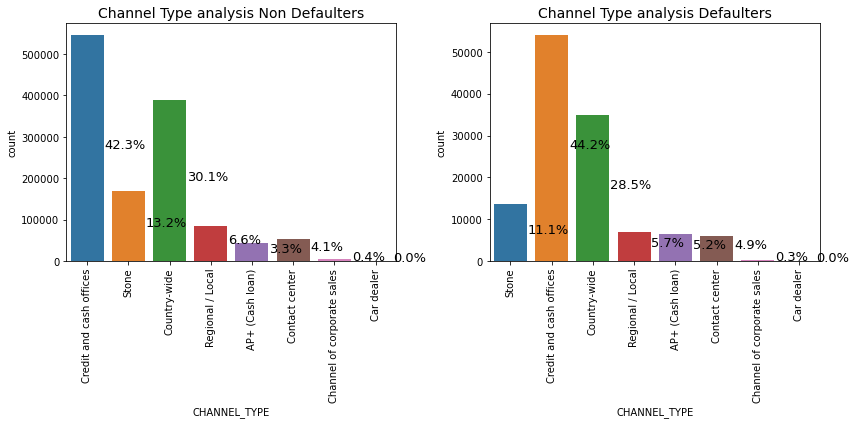

In [19]:
#countplot of name channel type for defaulters and non defaulter

plt.figure(figsize=[12,6])
plt.subplot(1,2,1)
ctype0=sns.countplot(x = merged_0["CHANNEL_TYPE"])
plt.title("Channel Type analysis Non Defaulters",size=14)
plt.xticks(rotation=90)


for p in ctype0.patches:
    percentage='{:.1f}%'.format(100*p.get_height()/len(merged_0),'.2f')
    x=p.get_x()+p.get_width()+0.02
    y=p.get_y()+p.get_height()/2
    ctype0.annotate(percentage,(x,y),size=13)
    
plt.subplot(1,2,2)
ctype1=sns.countplot(x = merged_1["CHANNEL_TYPE"])


for p in ctype1.patches:
    percentage='{:.1f}%'.format(100*p.get_height()/len(merged_1),'.2f')
    x=p.get_x()+p.get_width()+0.02
    y=p.get_y()+p.get_height()/2
    ctype1.annotate(percentage,(x,y),size=13)

plt.title("Channel Type analysis Defaulters",size=14)
plt.xticks(rotation=90)
plt.tight_layout()
           
plt.show()

In [180]:
ctype=merged_df.groupby(['CHANNEL_TYPE'])['TARGET']
ctype.value_counts(normalize=True)*100

CHANNEL_TYPE                TARGET
AP+ (Cash loan)             0         87.173545
                            1         12.826455
Car dealer                  0         94.827586
                            1          5.172414
Channel of corporate sales  0         93.624907
                            1          6.375093
Contact center              0         89.730179
                            1         10.269821
Country-wide                0         91.744000
                            1          8.256000
Credit and cash offices     0         90.988970
                            1          9.011030
Regional / Local            0         92.394455
                            1          7.605545
Stone                       0         92.630294
                            1          7.369706
Name: TARGET, dtype: float64

`Inference`

- Most loan applicants have previously been acquired through 'Credit and Cash office' and 'Country Wide' channel types.
- Applicants who have previously been acquired through 'AP+(cash loans)' and 'Contact Center' channel type have a higher percentage of Defaulters.
- Applicants who have previously been acquired through 'Car dealer' and 'Channel of corporate sales' channel type have a higher percentage of Non defaulters. 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_INCOME_TOTAL'>

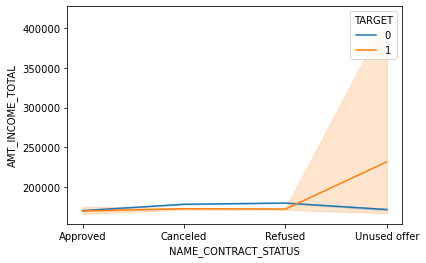

In [9]:
#lineplot for income total and contract status
sns.lineplot("NAME_CONTRACT_STATUS","AMT_INCOME_TOTAL",hue="TARGET",data=merged_df)

`Inference`

- Applicants who have previously unused offers, have defaulted on their loans.
- These defaulter applicants with unused offers, also have relatively higher income total than the average.